In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pywaffle
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
#from imblearn.over_sampling import SMOTE
#import scikitplot as skplt

C:\Users\dhars\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikitplot

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [4]:
pip install pywaffle

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
train_df = pd.read_csv('Train_set_(1)_(1).csv')
train_df.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [7]:
train_df.shape

(93174, 23)

In [8]:
train_df.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [9]:
train_df.duplicated().sum()

0

In [10]:
train_df.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default'],
      dtype='object')

In [12]:
test_df = pd.read_csv('Test_set_(1)_(2).csv')
test_df.shape

(39933, 22)

In [ ]:
df['default'].value_counts(normalize = False)

default
0.0    71045
1.0    22129
Name: count, dtype: int64

In [ ]:
 22129/71045

0.31147864029840244

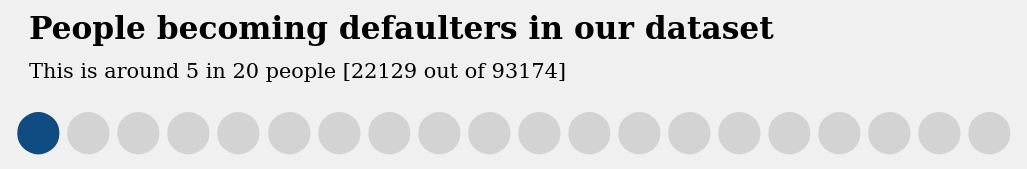

In [ ]:
from pywaffle import Waffle

# Define the background color
background_color = "#f0f0f0"  # This is a light gray color in hexadecimal format

fig = plt.figure(figsize=(7, 2),dpi=150,facecolor= background_color,
    FigureClass=Waffle,
    rows=1,
    values=[1, 19],
    colors=['#0f4c81', "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)


fig.text(0.035,0.78,'People becoming defaulters in our dataset',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.035,0.65,'This is around 5 in 20 people [22129 out of 93174]',fontfamily='serif',fontsize=10)

plt.show()

In [13]:
train_df.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [14]:
test_df.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [ ]:
train_df['total_current_balance'] = train_df['total_current_balance'].fillna(train_df['total_current_balance'].median())
train_df['total_revolving_limit'] = train_df['total_revolving_limit'].fillna(train_df['total_revolving_limit'].median())
train_df['last_week_pay'] = train_df['last_week_pay'].fillna(train_df['last_week_pay'].median())
train_df['delinq_2yrs'] = train_df['delinq_2yrs'].fillna(train_df['delinq_2yrs'].median())
train_df['total_acc'] = train_df['total_acc'].fillna(train_df['total_acc'].median())
train_df['public_records'] = train_df['public_records'].fillna(train_df['public_records'].median())
train_df['annual_income'] = train_df['annual_income'].fillna(train_df['annual_income'].median())
train_df['job_experience'] = train_df['job_experience'].fillna('not_available')

In [16]:
test_df['total_current_balance'] = test_df['total_current_balance'].fillna(test_df['total_current_balance'].median())
test_df['total_revolving_limit'] = test_df['total_revolving_limit'].fillna(test_df['total_revolving_limit'].median())
test_df['last_week_pay'] = test_df['last_week_pay'].fillna(test_df['last_week_pay'].median())
test_df['delinq_2yrs'] = test_df['delinq_2yrs'].fillna(test_df['delinq_2yrs'].median())
test_df['total_acc'] = test_df['total_acc'].fillna(test_df['total_acc'].median())
test_df['public_records'] = test_df['public_records'].fillna(test_df['public_records'].median())
test_df['annual_income'] = test_df['annual_income'].fillna(test_df['annual_income'].median())
test_df['job_experience'] = test_df['job_experience'].fillna('not_available')


In [17]:
train_df.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [18]:
test_df.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
dev, val = train_test_split(train_df, test_size=0.1, random_state = 42)

In [20]:
dev["sample_type"] ="dev"
val["sample_type"]= "val"
test_df["sample_type"]= "oot"
df = pd.concat([dev,val,test_df])
df.shape

(133107, 24)

In [21]:
df['sample_type'].value_counts(normalize = True)*100

sample_type
dev    62.998941
oot    30.000676
val     7.000383
Name: proportion, dtype: float64

In [22]:
cat_cols = [cols for cols in df.columns if df[cols].dtype == 'object']
id_cols = [cols for cols in df.columns if 'ID' in cols.upper()]
num_cols = [cols for cols in df.columns if df[cols].dtype != 'object' and cols not in id_cols and cols!= 'default']

In [23]:
df.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default,sample_type
61438,68288755,23000,3 years,9.99,B,B3,not_available,MORTGAGE,78772.0,Not Verified,...,1.0,23264,34.0,359.22,INDIVIDUAL,9.0,23264.0,33600.0,0.0,dev
72164,42822754,12800,5 years,13.66,C,C3,10+ years,MORTGAGE,54000.0,Source Verified,...,0.0,8320,23.0,1495.95,INDIVIDUAL,48.0,34944.0,20400.0,0.0,dev
40911,70368768,35000,3 years,14.48,C,C5,6-10 years,MORTGAGE,90000.0,Verified,...,0.0,20130,37.0,366.02,INDIVIDUAL,4.0,47277.0,27800.0,0.0,dev
86189,64963545,20000,5 years,19.19,E,E3,<5 Years,RENT,52000.0,Source Verified,...,1.0,5641,26.0,1056.42,INDIVIDUAL,13.0,43667.0,43100.0,0.0,dev
71131,13378865,32000,5 years,14.16,C,C2,<5 Years,RENT,92000.0,Verified,...,0.0,31440,20.0,7484.47,INDIVIDUAL,100.0,172624.0,45100.0,0.0,dev


In [24]:
df['default'].unique()

array([ 0.,  1., nan])

<Axes: ylabel='state_code'>

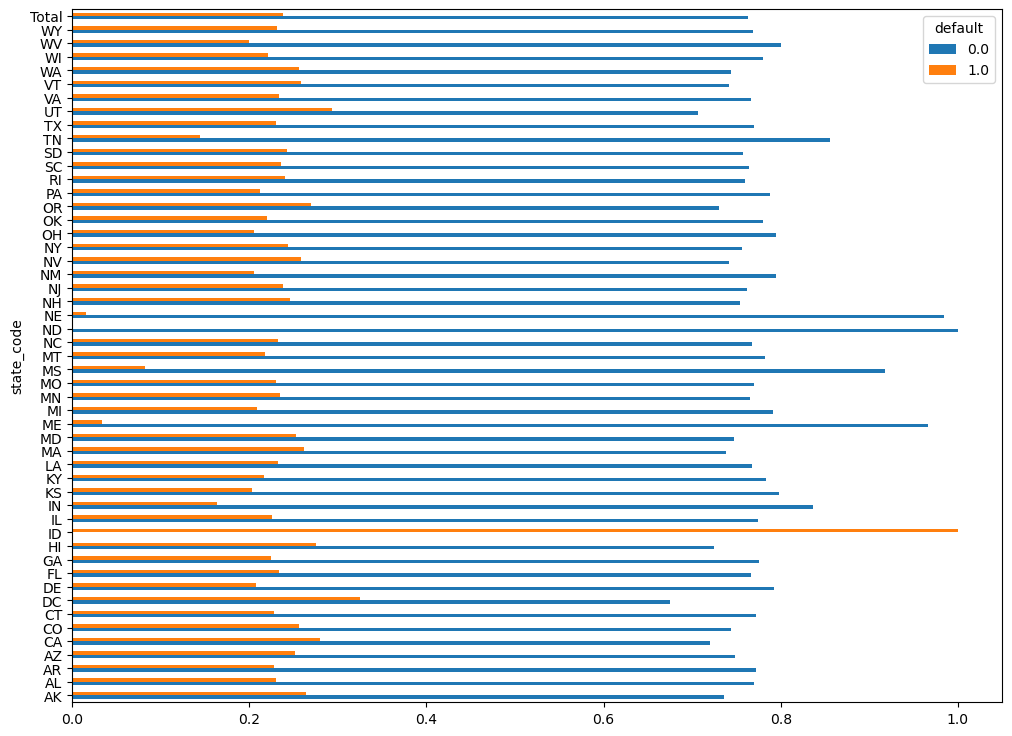

In [25]:
pd.crosstab(columns = df['default'], index = df['state_code'], values = df['ID'], margins = True, 
            margins_name = 'Total', aggfunc = 'count', normalize = 'index').plot(kind = 'barh', figsize = (12,9))

In [26]:
cat_cols


['loan_term',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'income_verification_status',
 'loan_purpose',
 'state_code',
 'application_type',
 'sample_type']

In [27]:
df['loan_term'].unique()

array(['3 years', '5 years'], dtype=object)

In [28]:
df['loan_term'] = df['loan_term'].apply(lambda x: x.split()[0])

In [29]:
pd.crosstab(columns = df['default'], index = df['loan_term'], values = df['ID'], aggfunc = 'count',
            margins = True, margins_name = 'Total', normalize = 'index')

default,0.0,1.0
loan_term,,
3,0.726028,0.273972
5,0.847549,0.152451
Total,0.762498,0.237502


<Axes: ylabel='loan_term'>

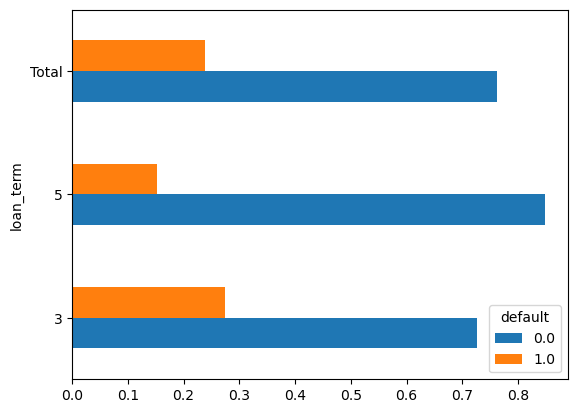

In [30]:
pd.crosstab(columns = df['default'], index = df['loan_term'], values = df['ID'], aggfunc = 'count',
            margins = True, margins_name = 'Total', normalize = 'index').plot(kind = 'barh')

#bad rate is high in the 3 years loan_term

In [31]:
df['loan_grade'].value_counts()

loan_grade
B    38416
C    36735
A    22298
D    20952
E    10536
F     3374
G      796
Name: count, dtype: int64

In [32]:
pd.crosstab(columns = df['default'], index = df['loan_grade'], values = df['ID'], aggfunc = 'count',
            margins = True, margins_name = 'Total', normalize = 'index')

default,0.0,1.0
loan_grade,,
A,0.726213,0.273787
B,0.736535,0.263465
C,0.783457,0.216543
D,0.780020,0.219980
E,0.813635,0.186365
F,0.794369,0.205631
G,0.782214,0.217786
Total,0.762498,0.237502


#highest number of bad rates are in loan_grade A while lowest in loan_grade E

<Axes: ylabel='loan_grade'>

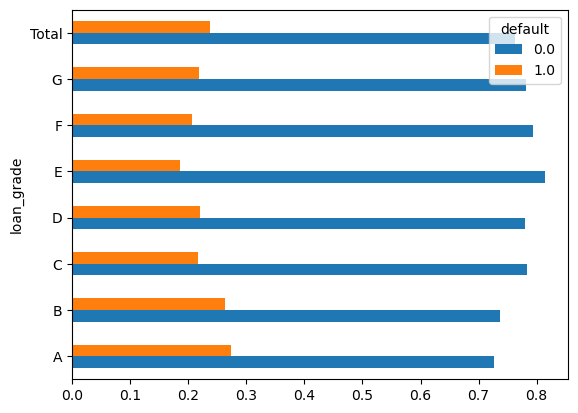

In [33]:
pd.crosstab(columns = df['default'], index = df['loan_grade'], values = df['ID'], aggfunc = 'count',
            margins = True, margins_name = 'Total', normalize = 'index').plot(kind = 'barh')

In [34]:
df['loan_subgrade'].nunique()

35

In [35]:
pd.crosstab(columns = df['default'], index = df['loan_subgrade'], values = df['ID'], aggfunc = 'count',
            margins_name = 'Total', margins = True, 
            normalize = 'index')

default,0.0,1.0
loan_subgrade,,
A1,0.748843,0.251157
A2,0.726732,0.273268
A3,0.706531,0.293469
A4,0.689066,0.310934
A5,0.753335,0.246665
B1,0.757588,0.242412
B2,0.725479,0.274521
B3,0.713727,0.286273
B4,0.737370,0.262630


<Axes: ylabel='loan_subgrade'>

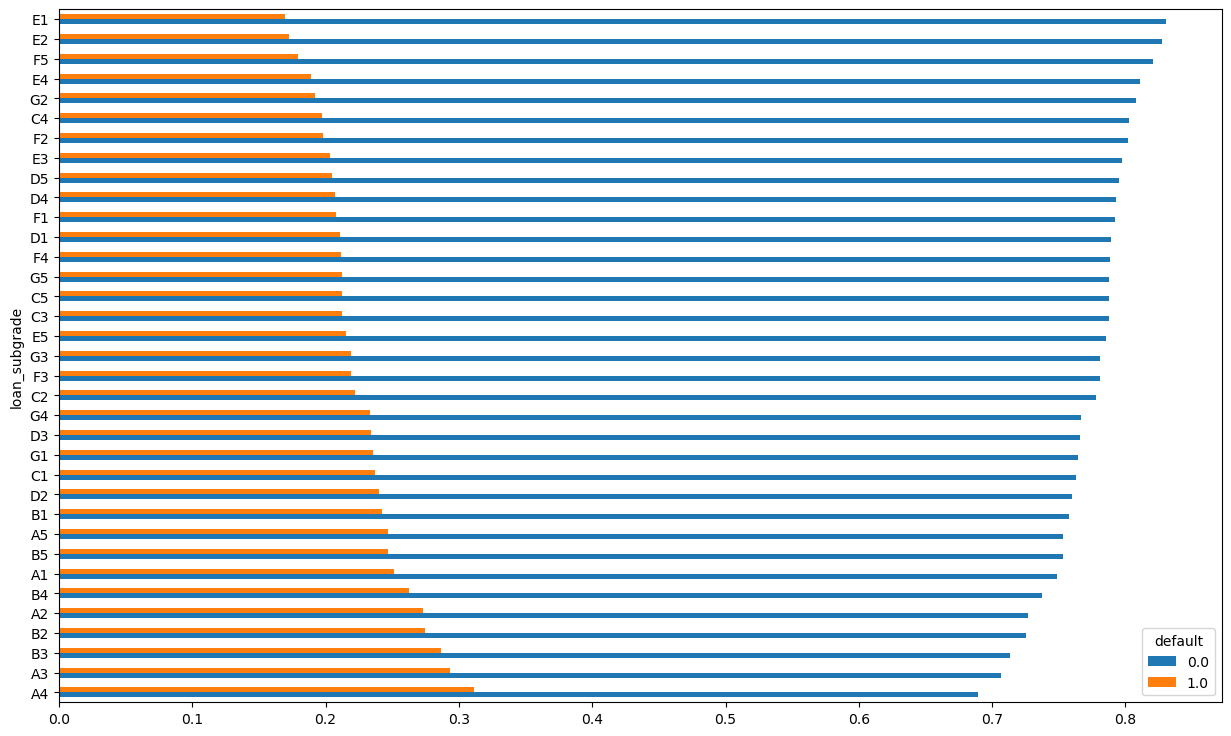

In [36]:
pd.crosstab(columns = df['default'], index = df['loan_subgrade'], values = df['ID'], aggfunc = 'count',
            margins_name = 'Total', 
            normalize = 'index').sort_values(by = 1, ascending = False).plot(kind= 'barh', figsize = (15,9))

In [37]:
#
'''df['loan_subgrade'] = df['loan_subgrade'].apply(lambda x: 'A' if 'A' in x.upper() 
                          else 'B' if 'B' in x.upper()
                          else 'C' if 'C' in x.upper() 
                          else 'D' if 'D' in x.upper()
                          else 'E' if 'E' in x.upper()
                          else 'F' if 'F' in x.upper()
                          else 'G') 
'''

"df['loan_subgrade'] = df['loan_subgrade'].apply(lambda x: 'A' if 'A' in x.upper() \n                          else 'B' if 'B' in x.upper()\n                          else 'C' if 'C' in x.upper() \n                          else 'D' if 'D' in x.upper()\n                          else 'E' if 'E' in x.upper()\n                          else 'F' if 'F' in x.upper()\n                          else 'G') \n"

In [38]:
df['loan_subgrade'].unique()

array(['B3', 'C3', 'C5', 'E3', 'C2', 'B5', 'B4', 'B2', 'D5', 'E1', 'D1',
       'A5', 'A4', 'F3', 'A3', 'C1', 'F1', 'D3', 'C4', 'A1', 'F2', 'B1',
       'G3', 'D4', 'A2', 'E5', 'D2', 'E4', 'E2', 'F4', 'F5', 'G1', 'G2',
       'G5', 'G4'], dtype=object)

In [39]:
df['loan_subgrade'].value_counts()

loan_subgrade
B3    8426
B4    8398
C1    7879
C2    7850
C3    7490
B2    7375
B5    7342
C4    7266
B1    6875
A5    6792
C5    6250
D1    5292
A4    5190
D2    4612
D3    3934
D4    3858
A3    3524
A1    3444
A2    3348
D5    3256
E1    2727
E2    2491
E3    2165
E4    1747
E5    1406
F1    1057
F2     799
F3     660
F4     502
F5     356
G1     245
G2     218
G3     151
G5      97
G4      85
Name: count, dtype: int64

In [40]:
cat_cols

['loan_term',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'income_verification_status',
 'loan_purpose',
 'state_code',
 'application_type',
 'sample_type']

In [41]:
df['job_experience'].unique()

array(['not_available', '10+ years', '6-10 years', '<5 Years'],
      dtype=object)

In [42]:
df[pd.isna(df['job_experience'])]['default'].mean()

nan

#around 16 % defaulters are present in the null values.. have to consider them while building the model

In [43]:
df['job_experience'].unique()

array(['not_available', '10+ years', '6-10 years', '<5 Years'],
      dtype=object)

In [44]:
df['job_experience'].isna().sum()

0

In [45]:
df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [46]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    66453
RENT        53387
OWN         13233
OTHER          24
NONE           10
Name: count, dtype: int64

In [47]:
df['home_ownership']= df['home_ownership'].apply(lambda x: 'OTHER' if x== 'NONE' else x)

In [48]:
df['income_verification_status'].value_counts()

income_verification_status
Source Verified    49267
Verified           43645
Not Verified       40195
Name: count, dtype: int64

In [49]:
pd.crosstab(columns = df['default'], index = df['income_verification_status'], values = df['ID'],
            aggfunc = 'count', margins = True, margins_name = 'Total', normalize = 'index')

default,0.0,1.0
income_verification_status,,
Not Verified,0.719942,0.280058
Source Verified,0.813698,0.186302
Verified,0.743974,0.256026
Total,0.762498,0.237502


#the bad rate in the not verified section is highest while the source verified part contains the lowest bad rate percentage

In [50]:
df['loan_purpose'].value_counts()

loan_purpose
debt_consolidation    78714
credit_card           30954
other                 15664
home_improvement       7775
Name: count, dtype: int64

In [51]:
pd.crosstab(columns = df['default'], index = df['loan_purpose'], values = df['ID'],
            aggfunc = 'count', margins = True, margins_name = 'Total', normalize = 'index')

default,0.0,1.0
loan_purpose,,
credit_card,0.788373,0.211627
debt_consolidation,0.767691,0.232309
home_improvement,0.754591,0.245409
other,0.689363,0.310637
Total,0.762498,0.237502


#it seems like the credit card as purpose as the least bad rate while 'other' contains the highest bad rate

In [52]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    133027
JOINT             80
Name: count, dtype: int64

In [53]:
pd.crosstab(columns = df['default'], index = df['application_type'], values = df['ID'], 
            aggfunc = 'count', margins = True, 
            margins_name= 'total',normalize = 'index')

default,0.0,1.0
application_type,,
INDIVIDUAL,0.762355,0.237645
JOINT,1.000000,0.000000
total,0.762498,0.237502


<Axes: xlabel='application_type'>

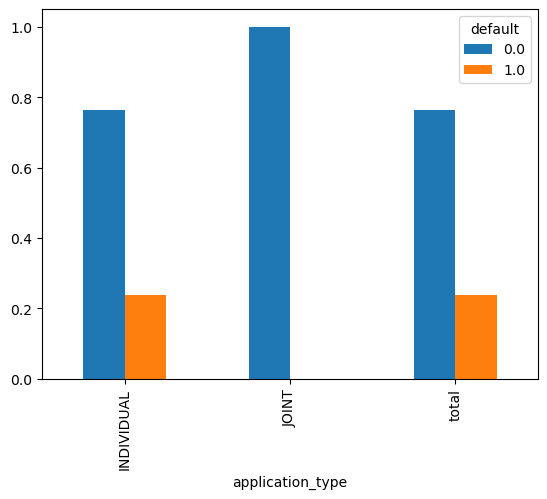

In [54]:
pd.crosstab(columns = df['default'], index = df['application_type'], values = df['ID'], 
            aggfunc = 'count', margins = True, 
            margins_name= 'total',normalize = 'index').plot(kind = 'bar')

In [55]:
cat_cols

['loan_term',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'income_verification_status',
 'loan_purpose',
 'state_code',
 'application_type',
 'sample_type']

In [56]:
df['state_code'].unique()

array(['GA', 'CA', 'LA', 'WA', 'NC', 'PA', 'FL', 'MD', 'MT', 'TX', 'OH',
       'VA', 'IL', 'TN', 'ME', 'NY', 'MI', 'OR', 'MO', 'KS', 'WY', 'AL',
       'RI', 'KY', 'CT', 'MN', 'NJ', 'SC', 'UT', 'AZ', 'OK', 'MA', 'CO',
       'NV', 'WI', 'MS', 'NM', 'AR', 'IN', 'HI', 'NE', 'NH', 'DC', 'DE',
       'WV', 'ND', 'VT', 'AK', 'SD', 'ID'], dtype=object)

In [57]:
state = pd.crosstab(columns = dev['default'], index = dev['state_code'], values = dev['ID'], 
            aggfunc = 'count', margins = True, 
            margins_name= 'total',normalize = 'columns').sort_values(by = 1,ascending = False )[['total']]
state

default,total
state_code,
CA,0.146740
NY,0.083703
TX,0.080078
FL,0.068439
IL,0.039687
NJ,0.037242
PA,0.035561
GA,0.032389
VA,0.030016


In [58]:
pd.crosstab(columns = dev['default'], index = dev['state_code'], values = dev['ID'], 
            aggfunc = 'count', margins = True, 
            margins_name= 'total',normalize = 'columns').sort_values(by = 1,ascending = False )

default,0,1,total
state_code,,,
CA,0.138836,0.172256,0.146740
NY,0.083014,0.085926,0.083703
TX,0.080609,0.078362,0.080078
FL,0.069114,0.066260,0.068439
IL,0.040359,0.037517,0.039687
NJ,0.037282,0.037114,0.037242
PA,0.036720,0.031819,0.035561
GA,0.032862,0.030861,0.032389
VA,0.030113,0.029701,0.030016


In [59]:
state_group = {}
count_add = [] 
states1=[]
for i in range(len(state)):
    if state.reset_index().loc[i,"total"] >= 0.05:
        states=[]
        state_code = state.reset_index().loc[i,"state_code"]
        states.append(state_code)
        # print(states.append(state_code))
        state_group["group_"+str(i)] = states
    else:
        count = state.reset_index().loc[i,"total"]
        count_add.append(count)
        print(count_add)
        state_code = state.reset_index().loc[i,"state_code"]
        states1.append(state_code)
        if sum(count_add)>=0.05:
            print(sum(count_add),states1)
            state_group["group_"+str(i)] = states1
            count_add = [] 
            states1=[]

[0.03968708261782103]
[0.03968708261782103, 0.0372424155695478]
0.07692949818736883 ['IL', 'NJ']
[0.035560961648540355]
[0.035560961648540355, 0.03238885708834192]
0.06794981873688227 ['PA', 'GA']
[0.03001574127074986]
[0.03001574127074986, 0.03343827513833238]
0.06345401640908224 ['VA', 'OH']
[0.02876359473382942]
[0.02876359473382942, 0.02400543789353177]
0.05276903262736119 ['NC', 'MA']
[0.024661324174775807]
[0.024661324174775807, 0.022562488074794888]
[0.024661324174775807, 0.022562488074794888, 0.022002003434459072]
0.06922581568402977 ['MD', 'AZ', 'WA']
[0.02073793169242511]
[0.02073793169242511, 0.026008872352604465]
[0.02073793169242511, 0.026008872352604465, 0.01758967754245373]
0.06433648158748331 ['CO', 'MI', 'MN']
[0.015848597595878647]
[0.015848597595878647, 0.013952489982827705]
[0.015848597595878647, 0.013952489982827705, 0.014989982827704636]
[0.015848597595878647, 0.013952489982827705, 0.014989982827704636, 0.011698626216370921]
0.056489696622781915 ['MO', 'NV', 'CT',

In [60]:
group_dict = {}
for group ,value in state_group.items():
    for v in value:
        group_dict[v] = group
    

In [61]:
group_dict

{'CA': 'group_0',
 'NY': 'group_1',
 'TX': 'group_2',
 'FL': 'group_3',
 'IL': 'group_5',
 'NJ': 'group_5',
 'PA': 'group_7',
 'GA': 'group_7',
 'VA': 'group_9',
 'OH': 'group_9',
 'NC': 'group_11',
 'MA': 'group_11',
 'MD': 'group_14',
 'AZ': 'group_14',
 'WA': 'group_14',
 'CO': 'group_17',
 'MI': 'group_17',
 'MN': 'group_17',
 'MO': 'group_21',
 'NV': 'group_21',
 'CT': 'group_21',
 'OR': 'group_21',
 'AL': 'group_26',
 'SC': 'group_26',
 'WI': 'group_26',
 'LA': 'group_26',
 'IN': 'group_26',
 'TN': 'group_32',
 'KY': 'group_32',
 'OK': 'group_32',
 'UT': 'group_32',
 'AR': 'group_32',
 'KS': 'group_32'}

In [62]:
len(set(group_dict.values()))

13

In [63]:
df['state_code_m']  = df['state_code'].apply(lambda x: group_dict[x] if x in group_dict.keys() else 'group_others')
df['state_code_m']

61438     group_7
72164     group_0
40911    group_26
86189    group_14
71131    group_11
           ...   
39928    group_17
39929    group_14
39930     group_2
39931    group_26
39932     group_3
Name: state_code_m, Length: 133107, dtype: object

In [64]:
for col in ['state_code_m', 'sample_type']:
    df[col] = df[col].astype(str)

In [65]:
cat_cols2= []
for col in df.columns:
    if df[col].dtypes == "object" and col not in ["state_code","sample_type"]:
        cat_cols2.append(col)
    
print(cat_cols2)

['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience', 'home_ownership', 'income_verification_status', 'loan_purpose', 'application_type', 'state_code_m']


In [66]:
for i in cat_cols2:
    print(i)
    print("*"*50)
    print(df[i].unique())
    print('__'*50)

loan_term
**************************************************
['3' '5']
____________________________________________________________________________________________________
loan_grade
**************************************************
['B' 'C' 'E' 'D' 'A' 'F' 'G']
____________________________________________________________________________________________________
loan_subgrade
**************************************************
['B3' 'C3' 'C5' 'E3' 'C2' 'B5' 'B4' 'B2' 'D5' 'E1' 'D1' 'A5' 'A4' 'F3'
 'A3' 'C1' 'F1' 'D3' 'C4' 'A1' 'F2' 'B1' 'G3' 'D4' 'A2' 'E5' 'D2' 'E4'
 'E2' 'F4' 'F5' 'G1' 'G2' 'G5' 'G4']
____________________________________________________________________________________________________
job_experience
**************************************************
['not_available' '10+ years' '6-10 years' '<5 Years']
____________________________________________________________________________________________________
home_ownership
**************************************************
['M

In [67]:
num_cols

['loan_amnt',
 'interest_rate',
 'annual_income',
 'debt_to_income',
 'delinq_2yrs',
 'public_records',
 'revolving_balance',
 'total_acc',
 'interest_receive',
 'last_week_pay',
 'total_current_balance',
 'total_revolving_limit']

In [68]:
df['loan_amnt'].describe()

count    133107.000000
mean      14748.299488
std        8428.080226
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

<Axes: ylabel='Frequency'>

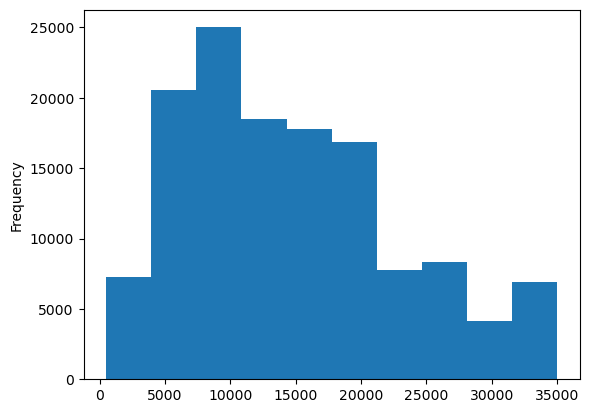

In [69]:
df['loan_amnt'].plot(kind = 'hist')

In [70]:
df['loan_bucket'] = pd.cut(df['loan_amnt'], bins = [0, 5000, 10000, 15000, 20000, np.PINF])
df['loan_bucket'].value_counts()

loan_bucket
(5000.0, 10000.0]     35206
(20000.0, inf]        30082
(10000.0, 15000.0]    29895
(15000.0, 20000.0]    22638
(0.0, 5000.0]         15286
Name: count, dtype: int64

In [71]:
pd.crosstab(columns = df['default'], index = df['loan_bucket'], values = df['ID'],
            aggfunc = 'count', margins = True, margins_name = 'total', normalize = 'index')

default,0.0,1.0
loan_bucket,,
"(0.0, 5000.0]",0.694777,0.305223
"(5000.0, 10000.0]",0.727526,0.272474
"(10000.0, 15000.0]",0.763175,0.236825
"(15000.0, 20000.0]",0.790592,0.209408
"(20000.0, inf]",0.816348,0.183652
total,0.762498,0.237502


#### From the above table it suggests that the loan with less amounts contains more number of bad rates

<Axes: ylabel='loan_bucket'>

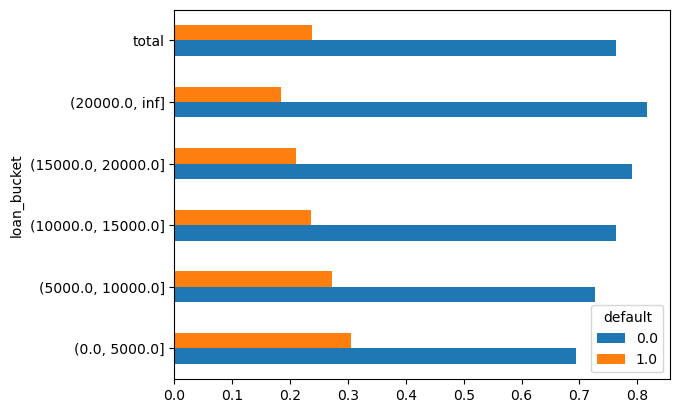

In [72]:
pd.crosstab(columns = df['default'], index = df['loan_bucket'], values = df['ID'],
            aggfunc = 'count', margins = True, margins_name = 'total', normalize = 'index').plot(kind = 'barh')

In [73]:
df['interest_rate'].describe()

count    133107.000000
mean         13.229180
std           4.375744
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: interest_rate, dtype: float64

In [74]:
df['interest_bucket'] = pd.cut(df['interest_rate'], bins = [5,8,12,16,20, np.PINF])
df['interest_bucket'].value_counts()

interest_bucket
(12.0, 16.0]    46014
(8.0, 12.0]     34983
(16.0, 20.0]    24776
(5.0, 8.0]      18711
(20.0, inf]      8623
Name: count, dtype: int64

In [75]:
pd.crosstab(columns = df['default'], index = df['interest_bucket'], values = df['ID'],
            aggfunc = 'count', margins = True, margins_name = 'total', normalize = 'index')

default,0.0,1.0
interest_bucket,,
"(5.0, 8.0]",0.752010,0.247990
"(8.0, 12.0]",0.775150,0.224850
"(12.0, 16.0]",0.749520,0.250480
"(16.0, 20.0]",0.774078,0.225922
"(20.0, inf]",0.770140,0.229860
total,0.762498,0.237502


In [76]:
round(df['annual_income'].describe())

count     133107.0
mean       75099.0
std        65851.0
min         1200.0
25%        45000.0
50%        64800.0
75%        90000.0
max      9500000.0
Name: annual_income, dtype: float64

In [77]:
df['annual_income_bucket'] = pd.cut(df['annual_income'], bins = [1000, 40000, 50000, 60000, 70000, 80000, 100000, np.PINF])
df['annual_income_bucket'].value_counts()

annual_income_bucket
(1000.0, 40000.0]      24560
(100000.0, inf]        23600
(40000.0, 50000.0]     18911
(50000.0, 60000.0]     18851
(80000.0, 100000.0]    18297
(60000.0, 70000.0]     15385
(70000.0, 80000.0]     13503
Name: count, dtype: int64

In [78]:
pd.crosstab(columns = df['default'], index = df['annual_income_bucket'], values = df['ID'],
            aggfunc = 'count', margins = True, margins_name = 'total', normalize = 'index')

default,0.0,1.0
annual_income_bucket,,
"(1000.0, 40000.0]",0.763886,0.236114
"(40000.0, 50000.0]",0.769415,0.230585
"(50000.0, 60000.0]",0.759915,0.240085
"(60000.0, 70000.0]",0.757212,0.242788
"(70000.0, 80000.0]",0.769027,0.230973
"(80000.0, 100000.0]",0.750467,0.249533
"(100000.0, inf]",0.766593,0.233407
total,0.762498,0.237502


<Axes: ylabel='annual_income_bucket'>

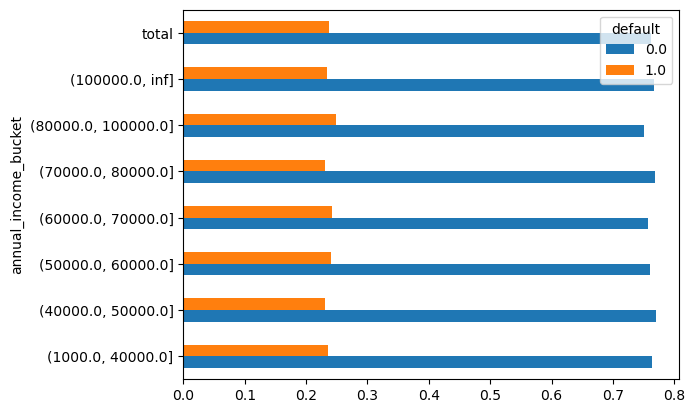

In [79]:
pd.crosstab(columns = df['default'], index = df['annual_income_bucket'], values = df['ID'],
            aggfunc = 'count', margins = True, margins_name = 'total', normalize = 'index').plot(kind = 'barh')

In [80]:
df['debt_to_income'].describe()

count    133107.000000
mean         18.125653
std           8.540594
min           0.000000
25%          11.940000
50%          17.630000
75%          23.890000
max         672.520000
Name: debt_to_income, dtype: float64

In [81]:
df['debt_to_income'].quantile(0.75) + 1.5*(df['debt_to_income'].quantile(0.75) - df['debt_to_income'].quantile(0.25))


41.815

In [82]:
df['debt_to_income_bucket']= pd.cut(df['debt_to_income'], bins = [np.NINF, 5, 10, 15,20,25,30, np.PINF ])
df['debt_to_income_bucket'].value_counts()

debt_to_income_bucket
(15.0, 20.0]    29338
(10.0, 15.0]    27351
(20.0, 25.0]    24280
(5.0, 10.0]     17447
(25.0, 30.0]    16470
(30.0, inf]     12046
(-inf, 5.0]      6175
Name: count, dtype: int64

In [83]:
pd.crosstab(columns = df['default'], index = df['debt_to_income_bucket'], values = df['ID'],
            aggfunc = 'count', margins = True, margins_name = 'total', normalize = 'index')

default,0.0,1.0
debt_to_income_bucket,,
"(-inf, 5.0]",0.637082,0.362918
"(5.0, 10.0]",0.705186,0.294814
"(10.0, 15.0]",0.731677,0.268323
"(15.0, 20.0]",0.753082,0.246918
"(20.0, 25.0]",0.773460,0.226540
"(25.0, 30.0]",0.829145,0.170855
"(30.0, inf]",0.889257,0.110743
total,0.762498,0.237502


lesser debt_to_income ratio yeilds more bad rate while with increase in the ratio the bad rate significantly decreases

In [84]:
df['delinq_2yrs'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  7.,  4.,  8.,  6.,  9., 10., 11., 15.,
       17., 12., 14., 22., 18., 13., 16., 19., 21.])

In [85]:
df.isnull().sum()

ID                                0
loan_amnt                         0
loan_term                         0
interest_rate                     0
loan_grade                        0
loan_subgrade                     0
job_experience                    0
home_ownership                    0
annual_income                     0
income_verification_status        0
loan_purpose                      0
state_code                        0
debt_to_income                    0
delinq_2yrs                       0
public_records                    0
revolving_balance                 0
total_acc                         0
interest_receive                  0
application_type                  0
last_week_pay                     0
total_current_balance             0
total_revolving_limit             0
default                       39933
sample_type                       0
state_code_m                      0
loan_bucket                       0
interest_bucket                   0
annual_income_bucket        

In [86]:
#df['delinq_2yrs'] = df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(axis = 0))

In [87]:
df['delinq_2yrs'].describe()

count    133107.000000
mean          0.315566
std           0.873039
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          22.000000
Name: delinq_2yrs, dtype: float64

In [88]:
df['delinq_2yrs'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  7.,  4.,  8.,  6.,  9., 10., 11., 15.,
       17., 12., 14., 22., 18., 13., 16., 19., 21.])

<Axes: ylabel='Frequency'>

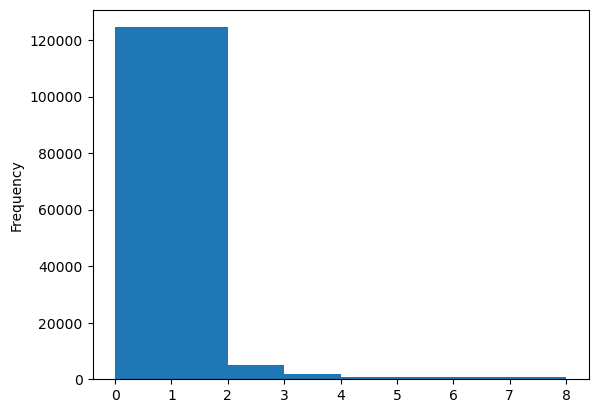

In [89]:
df['delinq_2yrs'].plot(kind = 'hist', bins = [0,2,3,4,5,8])

In [90]:
df['delinq_2yrs_bucket']= pd.cut(df['delinq_2yrs'], bins = [np.NINF,0.0001,0.0002,0.0005,0.001,1,np.PINF])
df['delinq_2yrs_bucket'].value_counts()

delinq_2yrs_bucket
(-inf, 0.0001]      107638
(0.001, 1.0]         16846
(1.0, inf]            8623
(0.0001, 0.0002]         0
(0.0002, 0.0005]         0
(0.0005, 0.001]          0
Name: count, dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


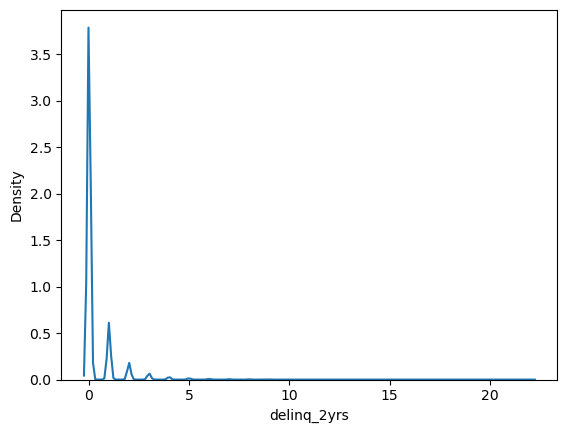

In [91]:
#sns.histplot(df['delinq_2yrs']);
sns.kdeplot(df['delinq_2yrs']);

In [92]:
df['delinq_2yrs'].skew()

5.521599372922509

In [93]:
df

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,total_current_balance,total_revolving_limit,default,sample_type,state_code_m,loan_bucket,interest_bucket,annual_income_bucket,debt_to_income_bucket,delinq_2yrs_bucket
61438,68288755,23000,3,9.99,B,B3,not_available,MORTGAGE,78772.0,Not Verified,...,23264.0,33600.0,0.0,dev,group_7,"(20000.0, inf]","(8.0, 12.0]","(70000.0, 80000.0]","(10.0, 15.0]","(-inf, 0.0001]"
72164,42822754,12800,5,13.66,C,C3,10+ years,MORTGAGE,54000.0,Source Verified,...,34944.0,20400.0,0.0,dev,group_0,"(10000.0, 15000.0]","(12.0, 16.0]","(50000.0, 60000.0]","(30.0, inf]","(-inf, 0.0001]"
40911,70368768,35000,3,14.48,C,C5,6-10 years,MORTGAGE,90000.0,Verified,...,47277.0,27800.0,0.0,dev,group_26,"(20000.0, inf]","(12.0, 16.0]","(80000.0, 100000.0]","(10.0, 15.0]","(-inf, 0.0001]"
86189,64963545,20000,5,19.19,E,E3,<5 Years,RENT,52000.0,Source Verified,...,43667.0,43100.0,0.0,dev,group_14,"(15000.0, 20000.0]","(16.0, 20.0]","(50000.0, 60000.0]","(20.0, 25.0]","(-inf, 0.0001]"
71131,13378865,32000,5,14.16,C,C2,<5 Years,RENT,92000.0,Verified,...,172624.0,45100.0,0.0,dev,group_11,"(20000.0, inf]","(12.0, 16.0]","(80000.0, 100000.0]","(15.0, 20.0]","(-inf, 0.0001]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39928,57779318,5000,3,8.18,B,B1,10+ years,MORTGAGE,65000.0,Source Verified,...,14422.0,26100.0,NaN,oot,group_17,"(0.0, 5000.0]","(8.0, 12.0]","(60000.0, 70000.0]","(10.0, 15.0]","(-inf, 0.0001]"
39929,59742362,1800,3,11.53,B,B5,6-10 years,MORTGAGE,55000.0,Source Verified,...,243469.0,29200.0,NaN,oot,group_14,"(0.0, 5000.0]","(8.0, 12.0]","(50000.0, 60000.0]","(25.0, 30.0]","(-inf, 0.0001]"
39930,72657145,15200,3,13.44,C,C3,10+ years,MORTGAGE,78000.0,Not Verified,...,145370.0,45400.0,NaN,oot,group_2,"(15000.0, 20000.0]","(12.0, 16.0]","(70000.0, 80000.0]","(15.0, 20.0]","(-inf, 0.0001]"
39931,15220189,14425,5,18.92,D,D4,<5 Years,MORTGAGE,38000.0,Not Verified,...,106449.0,19700.0,NaN,oot,group_26,"(10000.0, 15000.0]","(16.0, 20.0]","(1000.0, 40000.0]","(15.0, 20.0]","(-inf, 0.0001]"


In [94]:
val

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default,sample_type
51490,1876930,20000,5 years,18.75,D,D3,<5 Years,MORTGAGE,52000.0,Verified,...,0.0,3477,17.0,1230.24,INDIVIDUAL,18.0,153333.0,8000.0,0,val
84356,71985905,29800,5 years,19.99,E,E4,10+ years,MORTGAGE,70000.0,Source Verified,...,0.0,6509,44.0,463.33,INDIVIDUAL,4.0,172826.0,47300.0,0,val
41315,68711502,7500,3 years,9.17,B,B2,<5 Years,OWN,90000.0,Source Verified,...,0.0,10742,18.0,107.51,INDIVIDUAL,9.0,14650.0,26600.0,0,val
13945,25436072,5400,3 years,14.49,C,C4,10+ years,MORTGAGE,48000.0,Source Verified,...,0.0,8078,17.0,492.23,INDIVIDUAL,35.0,247468.0,11100.0,1,val
53760,2426527,8000,3 years,10.16,B,B1,10+ years,MORTGAGE,51000.0,Not Verified,...,0.0,11316,45.0,920.37,INDIVIDUAL,74.0,100854.0,33200.0,1,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79245,934947,16000,5 years,10.37,B,B3,6-10 years,MORTGAGE,62400.0,Source Verified,...,0.0,0,18.0,4008.11,INDIVIDUAL,183.0,79363.5,23700.0,1,val
46311,64488121,10000,3 years,7.26,A,A4,10+ years,MORTGAGE,70000.0,Not Verified,...,0.0,14957,36.0,224.84,INDIVIDUAL,17.0,188356.0,47800.0,0,val
75218,46495973,12000,5 years,21.67,E,E5,<5 Years,RENT,76000.0,Verified,...,0.0,845,10.0,1309.21,INDIVIDUAL,39.0,5036.0,10300.0,0,val
61148,39252381,4000,3 years,15.99,D,D2,<5 Years,RENT,70000.0,Verified,...,0.0,21143,35.0,555.75,INDIVIDUAL,52.0,108667.0,31800.0,0,val


In [95]:
df.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default',
       'sample_type', 'state_code_m', 'loan_bucket', 'interest_bucket',
       'annual_income_bucket', 'debt_to_income_bucket', 'delinq_2yrs_bucket'],
      dtype='object')

In [96]:
# Logarithmic transformation for skewed features
features_to_transform = ['total_revolving_limit', 'annual_income', 'revolving_balance', 'delinq_2yrs']
for feature in features_to_transform:
    df[feature + '_log'] = np.log(df[feature] + 1)

In [97]:
dev = df[df['sample_type'] == 'dev']
val = df[df['sample_type'] == 'val']
test_df = df[df['sample_type'] == 'oot']

In [98]:
dev['total_current_balance']

61438     23264.0
72164     34944.0
40911     47277.0
86189     43667.0
71131    172624.0
           ...   
6265     102251.0
54886     21528.0
76820      8523.0
860       17921.0
15795     53159.0
Name: total_current_balance, Length: 83856, dtype: float64

<Axes: ylabel='Density'>

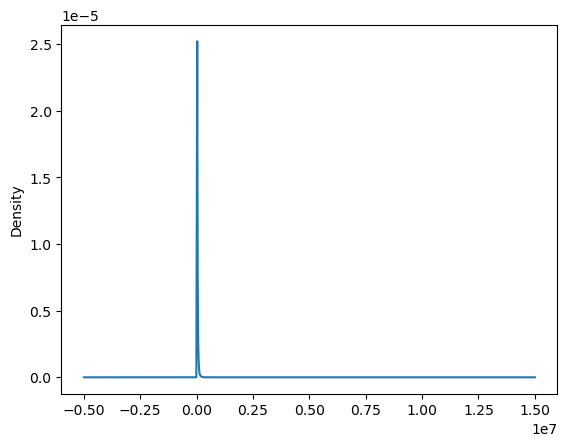

In [99]:
dev['total_revolving_limit'].plot(kind = 'kde')

In [100]:
#
'''from sklearn.impute import KNNImputer
trf2 = ColumnTransformer(transformers = [
    ('log', FunctionTransformer(np.log1p), ['delinq_2yrs']),
    ('knn',KNNImputer(n_neighbors= 10,weights='distance'), ['total_current_balance', 'total_revolving_limit'])], 
                         remainder = 'passthrough')

dev_scaled = trf2.fit_transform(dev)
val_scaled = trf2.transform(val)'''

"from sklearn.impute import KNNImputer\ntrf2 = ColumnTransformer(transformers = [\n    ('log', FunctionTransformer(np.log1p), ['delinq_2yrs']),\n    ('knn',KNNImputer(n_neighbors= 10,weights='distance'), ['total_current_balance', 'total_revolving_limit'])], \n                         remainder = 'passthrough')\n\ndev_scaled = trf2.fit_transform(dev)\nval_scaled = trf2.transform(val)"

# Weight of evidence and information value

In [101]:
# Calculate information value
import pandas as pd
import numpy as np
from scipy import stats

def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad']))

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data,data["IV"].sum()


In [102]:
cat_cols2

['loan_term',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'income_verification_status',
 'loan_purpose',
 'application_type',
 'state_code_m']

In [103]:
cat_iv_df = pd.DataFrame()
for col in cat_cols2:
    temp,iv=calc_iv(df[df["sample_type"]=="dev"], col, "default", pr=0)
    cat_iv_df = pd.concat([cat_iv_df,temp])

In [104]:
temp

,Variable,Value,All,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
1,state_code_m,group_0,12305,3416,0.146740,0.277611,0.138836,0.172256,-0.215683,0.007208
11,state_code_m,group_1,7019,1704,0.083703,0.242770,0.083014,0.085926,-0.034473,0.000100
4,state_code_m,group_11,4425,1090,0.052769,0.246328,0.052089,0.054964,-0.053732,0.000155
3,state_code_m,group_14,5805,1459,0.069226,0.251335,0.067880,0.073572,-0.080523,0.000458
12,state_code_m,group_17,5395,1242,0.064336,0.230213,0.064865,0.062629,0.035081,0.000078
7,state_code_m,group_2,6715,1554,0.080078,0.231422,0.080609,0.078362,0.028271,0.000064
13,state_code_m,group_21,4737,1146,0.056490,0.241925,0.056087,0.057788,-0.029874,0.000051
2,state_code_m,group_26,5434,1180,0.064802,0.217151,0.066443,0.059503,0.110318,0.000766
5,state_code_m,group_3,5739,1314,0.068439,0.228960,0.069114,0.066260,0.042167,0.000120
10,state_code_m,group_32,4798,981,0.057217,0.204460,0.059617,0.049468,0.186620,0.001894


In [105]:
cat_iv_df

,Variable,Value,All,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,loan_term,3,58632,16018,0.699199,0.273196,0.665584,0.807725,-0.193558,0.027513
1,loan_term,5,25224,3813,0.300801,0.151166,0.334416,0.192275,0.553461,0.078670
4,loan_grade,A,13988,3852,0.166810,0.275379,0.158313,0.194241,-0.204526,0.007348
0,loan_grade,B,24139,6314,0.287863,0.261568,0.278407,0.318390,-0.134195,0.005366
1,loan_grade,C,23203,4975,0.276701,0.214412,0.284701,0.250870,0.126506,0.004280
...,...,...,...,...,...,...,...,...,...,...
10,state_code_m,group_32,4798,981,0.057217,0.204460,0.059617,0.049468,0.186620,0.001894
9,state_code_m,group_5,6451,1480,0.076929,0.229422,0.077642,0.074631,0.039552,0.000119
0,state_code_m,group_7,5698,1243,0.067950,0.218147,0.069582,0.062680,0.104472,0.000721
8,state_code_m,group_9,5321,1159,0.063454,0.217816,0.065006,0.058444,0.106411,0.000698


In [106]:
cat_iv_df_total = cat_iv_df.groupby(['Variable']).agg({'IV': 'sum'})
cat_iv_df_total

,IV
Variable,
application_type,0.000000
home_ownership,0.005660
income_verification_status,0.051817
job_experience,0.015511
loan_grade,0.025852
loan_purpose,0.021289
loan_subgrade,0.034470
loan_term,0.106182
state_code_m,0.013133


In [107]:
# we can drop application_type as it has 0 iv

In [108]:
cat_cols3= []
for col in df.columns:
    if df[col].dtypes == "object" and col not in ["state_code","sample_type", 'application_type']:
        cat_cols3.append(col)
    
print(cat_cols3)

['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience', 'home_ownership', 'income_verification_status', 'loan_purpose', 'state_code_m']


In [109]:
cat_encoder = {}
for col in cat_cols3:
    cat_encoder[col] = dict(zip(cat_iv_df[cat_iv_df["Variable"]==col]["Value"],cat_iv_df[cat_iv_df["Variable"]==col]["WoE"]))

In [110]:
cat_encoder

{'loan_term': {'3': -0.19355751430021204, '5': 0.5534612655997172},
 'loan_grade': {'A': -0.20452631309893726,
  'B': -0.1341946860173364,
  'C': 0.12650624060918397,
  'D': 0.10044293486450644,
  'E': 0.2962881689260357,
  'F': 0.19068109993211518,
  'G': 0.07427990597060048},
 'loan_subgrade': {'A1': -0.07341497351378644,
  'A2': -0.20759889470958673,
  'A3': -0.3107791809283262,
  'A4': -0.3689307043848319,
  'A5': -0.07497967419290395,
  'B1': -0.04389253424746471,
  'B2': -0.1746687072189592,
  'B3': -0.25006107126701016,
  'B4': -0.12567980203002307,
  'B5': -0.046402174267717776,
  'C1': 0.002281790770202689,
  'C2': 0.0886769053720015,
  'C3': 0.15918824379287433,
  'C4': 0.24560407694208564,
  'C5': 0.15877479087348698,
  'D1': 0.15850223697999358,
  'D2': -0.012091314941496444,
  'D3': 0.025708515688492264,
  'D4': 0.16555046147717253,
  'D5': 0.19205063431336286,
  'E1': 0.40164342639357326,
  'E2': 0.40414983672877014,
  'E3': 0.1962485934353161,
  'E4': 0.2416660731261088,

In [111]:
!pip install optbinning

Defaulting to user installation because normal site-packages is not writeable


In [112]:
import optbinning as opt

(CVXPY) Jan 28 06:48:54 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 28 06:48:54 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [113]:
df.head(2)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,state_code_m,loan_bucket,interest_bucket,annual_income_bucket,debt_to_income_bucket,delinq_2yrs_bucket,total_revolving_limit_log,annual_income_log,revolving_balance_log,delinq_2yrs_log
61438,68288755,23000,3,9.99,B,B3,not_available,MORTGAGE,78772.0,Not Verified,...,group_7,"(20000.0, inf]","(8.0, 12.0]","(70000.0, 80000.0]","(10.0, 15.0]","(-inf, 0.0001]",10.422311,11.274326,10.054705,0.0
72164,42822754,12800,5,13.66,C,C3,10+ years,MORTGAGE,54000.0,Source Verified,...,group_0,"(10000.0, 15000.0]","(12.0, 16.0]","(50000.0, 60000.0]","(30.0, inf]","(-inf, 0.0001]",9.923339,10.896758,9.026538,0.0


In [114]:
df['ID']

61438    68288755
72164    42822754
40911    70368768
86189    64963545
71131    13378865
           ...   
39928    57779318
39929    59742362
39930    72657145
39931    15220189
39932    21810584
Name: ID, Length: 133107, dtype: int64

In [115]:
val.head(1)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,state_code_m,loan_bucket,interest_bucket,annual_income_bucket,debt_to_income_bucket,delinq_2yrs_bucket,total_revolving_limit_log,annual_income_log,revolving_balance_log,delinq_2yrs_log
51490,1876930,20000,5,18.75,D,D3,<5 Years,MORTGAGE,52000.0,Verified,...,group_2,"(15000.0, 20000.0]","(16.0, 20.0]","(50000.0, 60000.0]","(20.0, 25.0]","(-inf, 0.0001]",8.987322,10.859018,8.154213,0.0


In [116]:
test_df.head(1)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,state_code_m,loan_bucket,interest_bucket,annual_income_bucket,debt_to_income_bucket,delinq_2yrs_bucket,total_revolving_limit_log,annual_income_log,revolving_balance_log,delinq_2yrs_log
0,4855329,12000,3,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,group_0,"(10000.0, 15000.0]","(12.0, 16.0]","(70000.0, 80000.0]","(10.0, 15.0]","(-inf, 0.0001]",10.158169,11.203693,10.005909,0.0


In [117]:
df = df.set_index('ID')

In [118]:
df.head(2)

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,state_code_m,loan_bucket,interest_bucket,annual_income_bucket,debt_to_income_bucket,delinq_2yrs_bucket,total_revolving_limit_log,annual_income_log,revolving_balance_log,delinq_2yrs_log
ID,,,,,,,,,,,,,,,,,,,,,
68288755,23000,3,9.99,B,B3,not_available,MORTGAGE,78772.0,Not Verified,credit_card,...,group_7,"(20000.0, inf]","(8.0, 12.0]","(70000.0, 80000.0]","(10.0, 15.0]","(-inf, 0.0001]",10.422311,11.274326,10.054705,0.0
42822754,12800,5,13.66,C,C3,10+ years,MORTGAGE,54000.0,Source Verified,debt_consolidation,...,group_0,"(10000.0, 15000.0]","(12.0, 16.0]","(50000.0, 60000.0]","(30.0, inf]","(-inf, 0.0001]",9.923339,10.896758,9.026538,0.0


In [119]:
num_cols

['loan_amnt',
 'interest_rate',
 'annual_income',
 'debt_to_income',
 'delinq_2yrs',
 'public_records',
 'revolving_balance',
 'total_acc',
 'interest_receive',
 'last_week_pay',
 'total_current_balance',
 'total_revolving_limit']

  0%|          | 0/12 [00:00<?, ?it/s]

loan_amnt


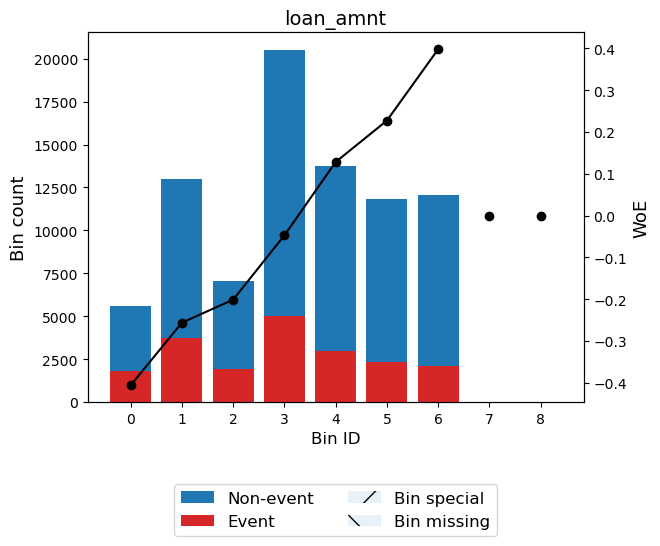

  8%|▊         | 1/12 [00:00<00:06,  1.70it/s]

#################### 1 #################
interest_rate


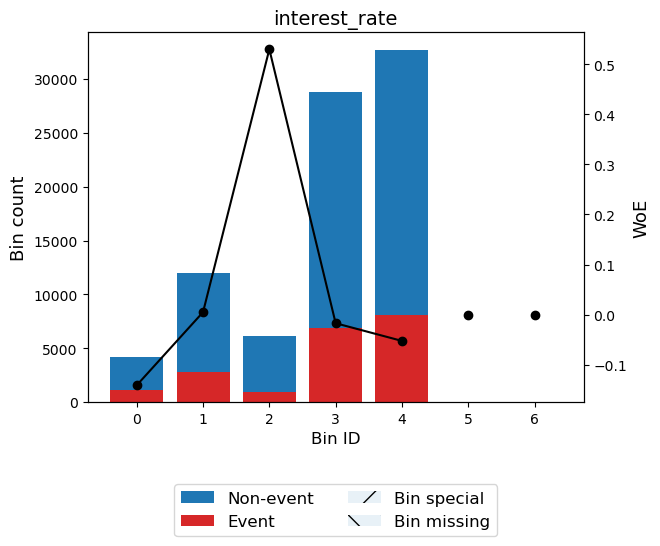

 17%|█▋        | 2/12 [00:00<00:04,  2.07it/s]

#################### 2 #################
annual_income


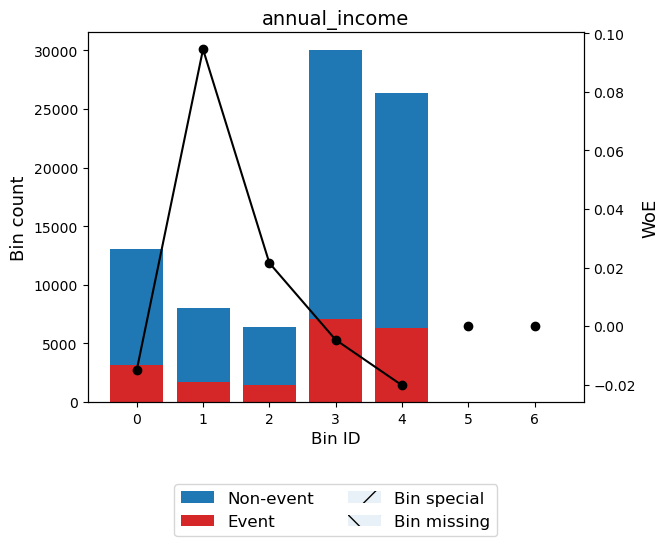

 25%|██▌       | 3/12 [00:01<00:04,  2.03it/s]

#################### 3 #################
debt_to_income


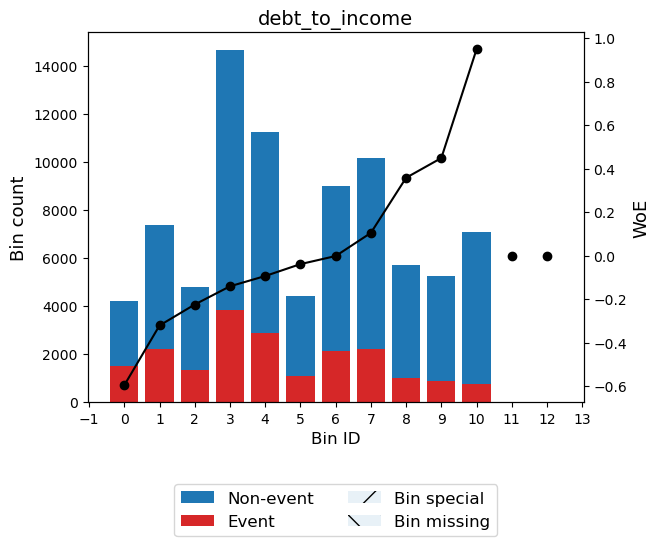

 33%|███▎      | 4/12 [00:01<00:03,  2.13it/s]

#################### 4 #################
delinq_2yrs


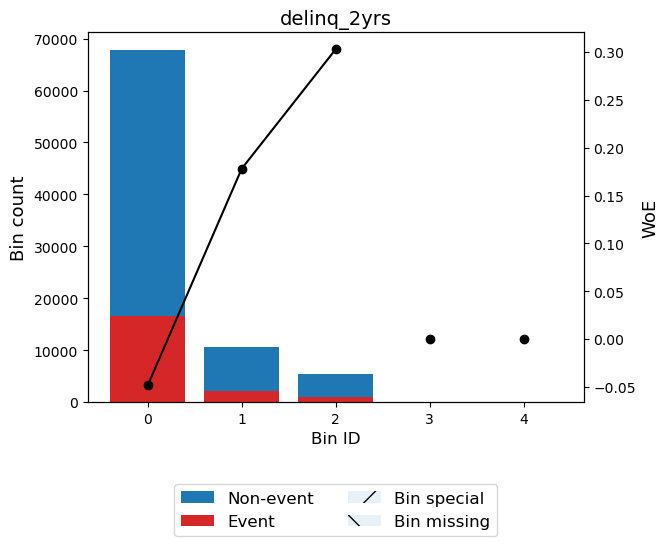

 42%|████▏     | 5/12 [00:02<00:02,  2.40it/s]

#################### 5 #################
public_records


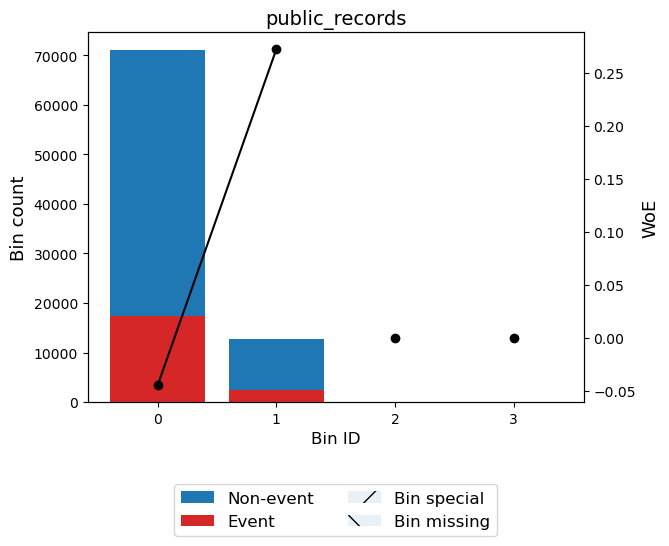

 50%|█████     | 6/12 [00:02<00:02,  2.54it/s]

#################### 6 #################
revolving_balance


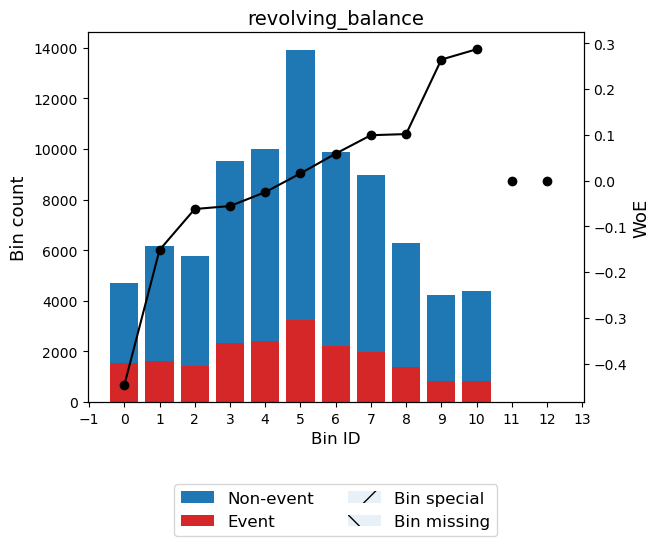

 58%|█████▊    | 7/12 [00:03<00:02,  2.08it/s]

#################### 7 #################
total_acc


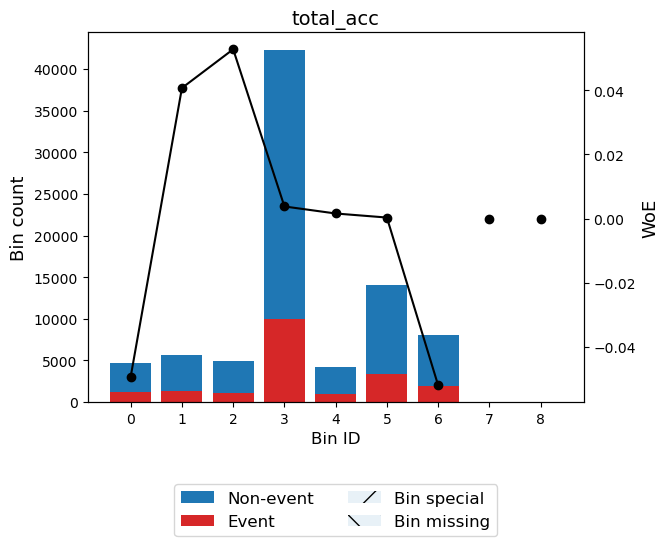

 67%|██████▋   | 8/12 [00:03<00:01,  2.04it/s]

#################### 8 #################
interest_receive


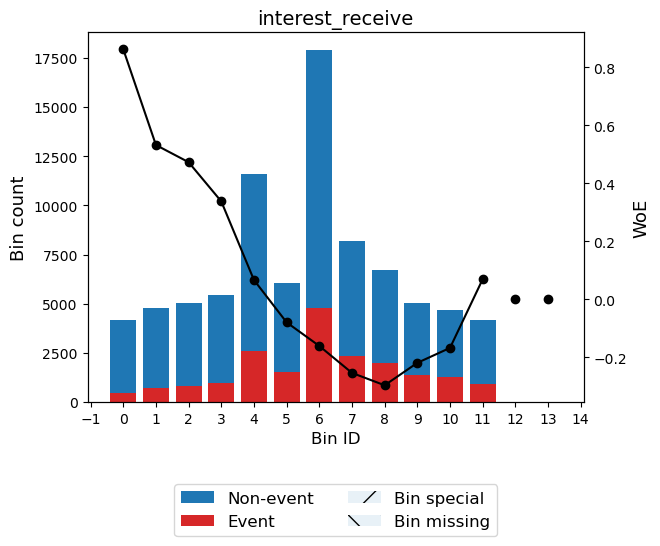

 75%|███████▌  | 9/12 [00:04<00:01,  1.83it/s]

#################### 9 #################
last_week_pay


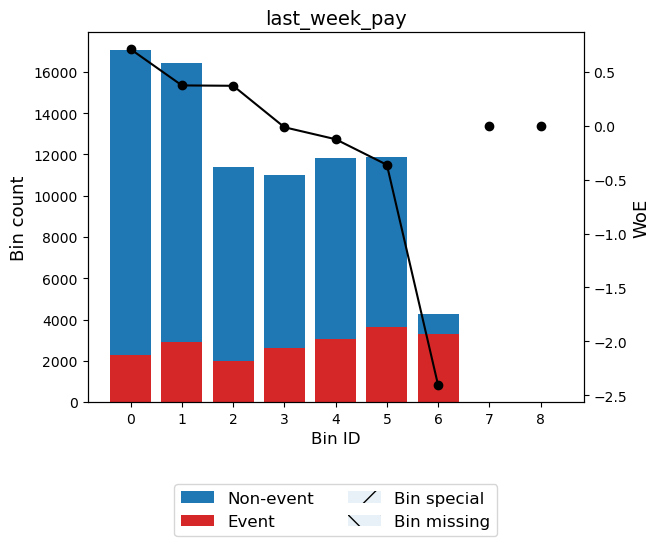

 83%|████████▎ | 10/12 [00:04<00:01,  1.90it/s]

#################### 10 #################
total_current_balance


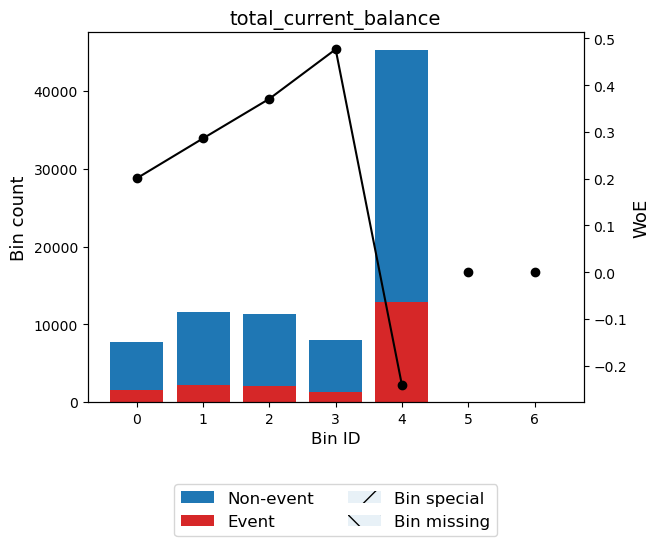

 92%|█████████▏| 11/12 [00:05<00:00,  1.67it/s]

#################### 11 #################
total_revolving_limit


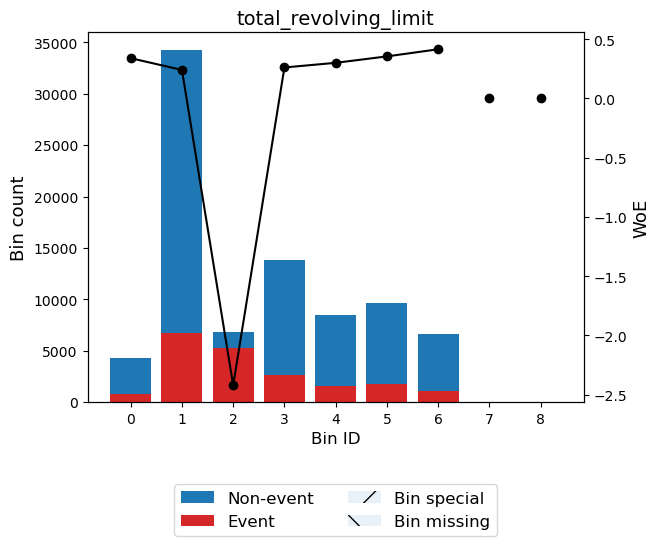

100%|██████████| 12/12 [00:06<00:00,  1.91it/s]

#################### 12 #################


In [120]:
#### weighted IV
from tqdm import tqdm
from optbinning import OptimalBinning

ivs = dict(np.complex64(x) for x in range(0))

details_binning_table = pd.DataFrame(columns = ['Variable_Name','Bin', 'Count', 'Count (%)', 'Non-event', 'Event', 'Event rate','distribution_good','distribution_bad' ,'WoE','IV'])

# sel_features = final_features
features = num_cols

target = 'default'

j=0
woe_table = pd.DataFrame(index=df.index)
for variable in tqdm(features):
    print(variable)
    x = dev[variable].values
    y = dev[target]
    
    optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
    optb.fit(x, y)

    binning_table = optb.binning_table
    tab = binning_table.build()
    optb.binning_table.plot(metric="woe")
    tab["distribution_good"] = tab["Non-event"]/tab.loc["Totals","Non-event"]
    tab["distribution_bad"] = tab["Event"]/tab.loc["Totals","Event"]
    tab['Variable_Name'] = variable
    # details_binning_table = pd.concat([details_binning_table,tab[['Variable_Name','Bin', 'Count', 'Count (%)', 'Non-event', 'Event', 'Event rate', 'WoE','IV']]])
    details_binning_table.loc[len(details_binning_table.index)] = tab.groupby("Variable_Name").agg(list).reset_index().loc[0]
    iv = tab.IV.Totals.round(3)
    ivs[variable] = round(iv,2)
    j=j+1
    print('####################',j,'#################')
    x_transform_woe = pd.DataFrame(optb.transform(df[variable], metric="woe"),columns=[variable],index=df.index)
    woe_table =pd.concat([woe_table,x_transform_woe],axis=1)
ivs_dataframe = pd.DataFrame(ivs.items(), columns = ["Variable_Name", "IV"]).sort_values(by="IV", ascending = False)

In [121]:
woe_table

,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit
ID,,,,,,,,,,,,
68288755,0.227406,0.529840,-0.004675,-0.225087,-0.048300,0.272169,0.098987,0.000335,0.337810,0.707813,0.286161,0.261587
42822754,-0.047232,-0.017275,-0.004675,0.948131,-0.048300,-0.044987,-0.025555,0.003791,-0.160426,0.369413,0.370802,0.240755
70368768,0.398090,-0.052580,-0.020204,-0.141370,-0.048300,-0.044987,0.098987,0.000335,0.337810,0.707813,0.370802,0.261587
64963545,0.227406,-0.052580,-0.004675,0.104130,-0.048300,0.272169,-0.055818,0.003791,-0.160426,0.707813,0.370802,0.300857
13378865,0.398090,-0.052580,-0.020204,-0.039369,-0.048300,-0.044987,0.101463,0.003791,0.069733,-0.363345,-0.241902,0.355163
...,...,...,...,...,...,...,...,...,...,...,...,...
57779318,-0.256275,0.004861,-0.004675,-0.141370,-0.048300,0.272169,-0.055818,0.003791,0.472957,0.372835,0.200697,0.261587
59742362,-0.406116,-0.017275,-0.004675,0.357500,-0.048300,0.272169,0.015509,0.000335,0.532104,0.372835,-0.241902,0.261587
72657145,0.128272,-0.017275,-0.004675,-0.002279,-0.048300,-0.044987,0.098987,0.003791,0.862072,0.369413,-0.241902,0.355163


In [122]:
details_binning_table[details_binning_table["Variable_Name"] == "loan_amnt"]

,Variable_Name,Bin,Count,Count (%),Non-event,Event,Event rate,distribution_good,distribution_bad,WoE,IV
0,loan_amnt,"[(-inf, 4012.50), [4012.50, 7887.50), [7887.50...","[5615, 13008, 7033, 20504, 13773, 11844, 12079...","[0.06696002671245946, 0.1551230681167716, 0.08...","[3833, 9290, 5101, 15478, 10824, 9500, 9999, 0...","[1782, 3718, 1932, 5026, 2949, 2344, 2080, 0, ...","[0.31736420302760465, 0.2858241082410824, 0.27...","[0.059867239359625145, 0.14509957048028113, 0....","[0.0898593111794665, 0.18748424184357823, 0.09...","[-0.40611580483209575, -0.25627459865540114, -...","[0.012180254385696889, 0.010862114642770045, 0..."


In [123]:
# create a new dataframe with unlisted values
def get_woe_iv_table(data,var):
    new_data = {}
    for index, row in data[data["Variable_Name"] == var].iterrows():
        variable = row['Variable_Name']
        for col_name, values in row.items():
            if col_name != 'Variable_Name':
                new_col_name = f'{col_name}'
                new_data[new_col_name] = values

    new_df = pd.DataFrame(new_data)
    
    new_df["var"] = var
    return new_df

In [124]:
get_woe_iv_table(details_binning_table,"loan_amnt")

,Bin,Count,Count (%),Non-event,Event,Event rate,distribution_good,distribution_bad,WoE,IV,var
0,"(-inf, 4012.50)",5615,0.066960,3833,1782,0.317364,0.059867,0.089859,-0.406116,0.012180,loan_amnt
1,"[4012.50, 7887.50)",13008,0.155123,9290,3718,0.285824,0.145100,0.187484,-0.256275,0.010862,loan_amnt
2,"[7887.50, 9762.50)",7033,0.083870,5101,1932,0.274705,0.079672,0.097423,-0.201146,0.003571,loan_amnt
3,"[9762.50, 14962.50)",20504,0.244514,15478,5026,0.245123,0.241749,0.253442,-0.047232,0.000552,loan_amnt
4,"[14962.50, 19437.50)",13773,0.164246,10824,2949,0.214115,0.169059,0.148707,0.128272,0.002611,loan_amnt
5,"[19437.50, 24937.50)",11844,0.141242,9500,2344,0.197906,0.148380,0.118199,0.227406,0.006863,loan_amnt
6,"[24937.50, inf)",12079,0.144045,9999,2080,0.172200,0.156173,0.104886,0.39809,0.020417,loan_amnt
7,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.0,0.000000,loan_amnt
8,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.0,0.000000,loan_amnt
9,,83856,1.000000,64025,19831,0.236489,1.000000,1.000000,,0.057056,loan_amnt


In [125]:
iv_table = pd.DataFrame()
for col in num_cols:
    temp = get_woe_iv_table(details_binning_table,col)
    temp=temp[(temp["Bin"]!="") &
    (temp["Bin"]!="Special")
   & (temp["Bin"]!="Missing")]
    iv_table = pd.concat([iv_table,temp],axis=0)

In [126]:
iv_table.groupby(["var"])["IV"].sum()

var
annual_income            0.001038
debt_to_income           0.115717
delinq_2yrs              0.011205
interest_rate            0.019934
interest_receive         0.087136
last_week_pay            0.512240
loan_amnt                0.057056
public_records           0.012232
revolving_balance        0.024470
total_acc                0.000679
total_current_balance    0.083143
total_revolving_limit    0.657634
Name: IV, dtype: float64

#CSI - characteristic stability index

In [127]:
def get_deciles(x,dict_):
    for interval,decile in dict_.items():
        if x in interval:
            return decile
        else:
            pass

In [128]:
dev["loan_amnt"]

61438    23000
72164    12800
40911    35000
86189    20000
71131    32000
         ...  
6265      7000
54886     6000
76820    10000
860      22225
15795    10000
Name: loan_amnt, Length: 83856, dtype: int64

In [129]:
cutoff = dict(zip(list(pd.qcut(dev["loan_amnt"],10,duplicates="drop").value_counts().sort_index().index),range(1,10+1)))
cutoff

{Interval(499.999, 5000.0, closed='right'): 1,
 Interval(5000.0, 7200.0, closed='right'): 2,
 Interval(7200.0, 9600.0, closed='right'): 3,
 Interval(9600.0, 11000.0, closed='right'): 4,
 Interval(11000.0, 13000.0, closed='right'): 5,
 Interval(13000.0, 15000.0, closed='right'): 6,
 Interval(15000.0, 18425.0, closed='right'): 7,
 Interval(18425.0, 21600.0, closed='right'): 8,
 Interval(21600.0, 28000.0, closed='right'): 9,
 Interval(28000.0, 35000.0, closed='right'): 10}

In [130]:
dev["loan_amnt"].apply(lambda x:get_deciles(x,cutoff)).value_counts().sort_index()

loan_amnt
1     9620
2     7779
3     8087
4     8611
5     8328
6     8240
7     8035
8     8400
9     9774
10    6982
Name: count, dtype: int64

In [131]:
def get_csi(actual,expected,var,bins=10):
    if expected.dtype!="object":
        cutoff = dict(zip(list(pd.qcut(expected,bins,duplicates="drop").value_counts().sort_index().index),range(1,bins+1)))
    else:
        cutoff  =dict(zip(np.sort(dev[var].unique()),range(1,expected.nunique()+1)))
    csi = pd.DataFrame(columns=["variable","deciles","bins_as_per_expected","expected_count","actual_count","expected_count%","actual_count%"],index=range(1,len(cutoff)+1))
    csi["variable"]  = var
    csi["deciles"] = range(1,len(cutoff)+1)
    csi["bins_as_per_expected"] = cutoff.keys()
    csi["expected_count"] = expected.apply(lambda x:get_deciles(x,cutoff)).value_counts().sort_index()
    csi["actual_count"] = actual.apply(lambda x:get_deciles(x,cutoff)).value_counts().sort_index()
    csi["expected_count%"] = csi["expected_count"]/(csi["expected_count"].sum())
    csi["actual_count%"] = csi["actual_count"]/(csi["actual_count"].sum())
    csi['Ac-Ec'] = csi["actual_count%"] - csi["expected_count%"]
    csi['ln(Ac/Ex)'] = np.log(csi["actual_count%"] / csi['expected_count%'])
    csi['CSI'] = csi['Ac-Ec'] * csi['ln(Ac/Ex)']
    
    return csi

#CSI on dev and val

In [132]:
cat_cols3

['loan_term',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'income_verification_status',
 'loan_purpose',
 'state_code_m']

In [133]:
dev['loan_grade'].unique()

array(['B', 'C', 'E', 'D', 'A', 'F', 'G'], dtype=object)

In [134]:
csi_df_val = pd.DataFrame()
for col in num_cols+cat_cols3:
    print(col)
    csi_df_val = pd.concat([csi_df_val,get_csi(val[col],dev[col],col,bins=10)])

loan_amnt
interest_rate
annual_income
debt_to_income
delinq_2yrs
public_records
revolving_balance
total_acc
interest_receive
last_week_pay
total_current_balance
total_revolving_limit
loan_term
loan_grade
loan_subgrade
job_experience
home_ownership
income_verification_status
loan_purpose
state_code_m


In [135]:
csi_df_val_values = csi_df_val.groupby("variable").agg({"CSI":"sum"})

In [136]:
csi_df_val_values.columns = ["CSI_val"]

In [137]:
csi_df_val_values

,CSI_val
variable,
annual_income,0.001551
debt_to_income,0.001728
delinq_2yrs,0.000048
home_ownership,0.000218
income_verification_status,0.000014
interest_rate,0.001476
interest_receive,0.000952
job_experience,0.000048
last_week_pay,0.001855


In [138]:
cat_encoder

{'loan_term': {'3': -0.19355751430021204, '5': 0.5534612655997172},
 'loan_grade': {'A': -0.20452631309893726,
  'B': -0.1341946860173364,
  'C': 0.12650624060918397,
  'D': 0.10044293486450644,
  'E': 0.2962881689260357,
  'F': 0.19068109993211518,
  'G': 0.07427990597060048},
 'loan_subgrade': {'A1': -0.07341497351378644,
  'A2': -0.20759889470958673,
  'A3': -0.3107791809283262,
  'A4': -0.3689307043848319,
  'A5': -0.07497967419290395,
  'B1': -0.04389253424746471,
  'B2': -0.1746687072189592,
  'B3': -0.25006107126701016,
  'B4': -0.12567980203002307,
  'B5': -0.046402174267717776,
  'C1': 0.002281790770202689,
  'C2': 0.0886769053720015,
  'C3': 0.15918824379287433,
  'C4': 0.24560407694208564,
  'C5': 0.15877479087348698,
  'D1': 0.15850223697999358,
  'D2': -0.012091314941496444,
  'D3': 0.025708515688492264,
  'D4': 0.16555046147717253,
  'D5': 0.19205063431336286,
  'E1': 0.40164342639357326,
  'E2': 0.40414983672877014,
  'E3': 0.1962485934353161,
  'E4': 0.2416660731261088,

#CAT VARIBALE ENCODING WITH WOE

In [139]:
for col in cat_cols3:
    print(col)
    df[col] = df[col].apply(lambda x:cat_encoder[col][x])

loan_term
loan_grade
loan_subgrade
job_experience
home_ownership
income_verification_status
loan_purpose
state_code_m


In [140]:
df[cat_cols3]

,loan_term,loan_grade,loan_subgrade,job_experience,home_ownership,income_verification_status,loan_purpose,state_code_m
ID,,,,,,,,
68288755,-0.193558,-0.134195,-0.250061,0.442533,-0.013869,-0.220602,0.141801,0.104472
42822754,0.553461,0.126506,0.159188,0.095230,-0.013869,0.309909,0.028574,-0.215683
70368768,-0.193558,0.126506,0.158775,-0.076548,-0.013869,-0.103083,0.028574,0.110318
64963545,0.553461,0.296288,0.196249,-0.079315,-0.020964,0.309909,0.028574,-0.080523
13378865,0.553461,0.126506,0.088677,-0.079315,-0.020964,-0.103083,0.141801,-0.053732
...,...,...,...,...,...,...,...,...
57779318,-0.193558,-0.134195,-0.043893,0.095230,-0.013869,0.309909,-0.049923,0.035081
59742362,-0.193558,-0.134195,-0.046402,-0.076548,-0.013869,0.309909,-0.049923,-0.080523
72657145,-0.193558,0.126506,0.159188,0.095230,-0.013869,-0.220602,0.141801,0.028271


In [141]:
df[num_cols+cat_cols3]

,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term,loan_grade,loan_subgrade,job_experience,home_ownership,income_verification_status,loan_purpose,state_code_m
ID,,,,,,,,,,,,,,,,,,,,
68288755,23000,9.99,78772.0,10.45,0.0,1.0,23264,34.0,359.22,9.0,23264.0,33600.0,-0.193558,-0.134195,-0.250061,0.442533,-0.013869,-0.220602,0.141801,0.104472
42822754,12800,13.66,54000.0,30.71,0.0,0.0,8320,23.0,1495.95,48.0,34944.0,20400.0,0.553461,0.126506,0.159188,0.095230,-0.013869,0.309909,0.028574,-0.215683
70368768,35000,14.48,90000.0,14.32,0.0,0.0,20130,37.0,366.02,4.0,47277.0,27800.0,-0.193558,0.126506,0.158775,-0.076548,-0.013869,-0.103083,0.028574,0.110318
64963545,20000,19.19,52000.0,24.53,0.0,1.0,5641,26.0,1056.42,13.0,43667.0,43100.0,0.553461,0.296288,0.196249,-0.079315,-0.020964,0.309909,0.028574,-0.080523
13378865,32000,14.16,92000.0,18.45,0.0,0.0,31440,20.0,7484.47,100.0,172624.0,45100.0,0.553461,0.126506,0.088677,-0.079315,-0.020964,-0.103083,0.141801,-0.053732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57779318,5000,8.18,65000.0,13.09,0.0,5.0,6731,24.0,187.27,26.0,14422.0,26100.0,-0.193558,-0.134195,-0.043893,0.095230,-0.013869,0.309909,-0.049923,0.035081
59742362,1800,11.53,55000.0,25.44,0.0,1.0,11092,38.0,81.24,26.0,243469.0,29200.0,-0.193558,-0.134195,-0.046402,-0.076548,-0.013869,0.309909,-0.049923,-0.080523
72657145,15200,13.44,78000.0,19.40,0.0,0.0,19688,26.0,0.00,48.0,145370.0,45400.0,-0.193558,0.126506,0.159188,0.095230,-0.013869,-0.220602,0.141801,0.028271


In [142]:
df[num_cols+cat_cols3].isnull().sum()

loan_amnt                     0
interest_rate                 0
annual_income                 0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
loan_term                     0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
income_verification_status    0
loan_purpose                  0
state_code_m                  0
dtype: int64

#feature selection

In [143]:
num_cols_iv = list(ivs_dataframe[ivs_dataframe["IV"]>0]["Variable_Name"])

In [144]:
cat_cols_iv = list(cat_iv_df_total.index)

In [145]:
all_feats_iv = num_cols_iv+cat_cols_iv
all_feats_iv

['total_revolving_limit',
 'last_week_pay',
 'debt_to_income',
 'interest_receive',
 'total_current_balance',
 'loan_amnt',
 'interest_rate',
 'revolving_balance',
 'delinq_2yrs',
 'public_records',
 'application_type',
 'home_ownership',
 'income_verification_status',
 'job_experience',
 'loan_grade',
 'loan_purpose',
 'loan_subgrade',
 'loan_term',
 'state_code_m']

In [146]:
type(csi_df_val_values)

pandas.core.frame.DataFrame

CSI

In [147]:
csi_all = csi_df_val_values.sort_index().reset_index()
csi_all

,variable,CSI_val
0,annual_income,0.001551
1,debt_to_income,0.001728
2,delinq_2yrs,0.000048
3,home_ownership,0.000218
4,income_verification_status,0.000014
5,interest_rate,0.001476
6,interest_receive,0.000952
7,job_experience,0.000048
8,last_week_pay,0.001855
9,loan_amnt,0.001409


In [148]:
all_feats_csi = list(csi_all[(csi_all["CSI_val"]<=.2) & (csi_all["variable"].isin(all_feats_iv)) ]["variable"])

In [149]:
all_feats_csi

['debt_to_income',
 'delinq_2yrs',
 'home_ownership',
 'income_verification_status',
 'interest_rate',
 'interest_receive',
 'job_experience',
 'last_week_pay',
 'loan_amnt',
 'loan_grade',
 'loan_purpose',
 'loan_subgrade',
 'loan_term',
 'public_records',
 'revolving_balance',
 'state_code_m',
 'total_current_balance',
 'total_revolving_limit']

In [150]:
len(all_feats_csi)

18

#correlation

In [151]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

def select_best_feature(df, x, corr_threshold):
    """
    Given a pandas DataFrame df, a list of x feature names, and a correlation threshold,
    returns a list of selected features where if two variables are correlated with a
    threshold then select any one having higher auc score. The function ignores self-correlation.
    """
    # Compute correlation matrix
    corr_matrix = df[x].corr()

    # Find pairs of features that are highly correlated
    correlated_pairs = []
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if abs(corr_matrix.loc[x[i], x[j]]) > corr_threshold and i != j:
                correlated_pairs.append((x[i], x[j]))
                # print(correlated_pairs)

    # Select features based on correlation and AUC score
    auc_score = {}
    for feat in x:
        auc_score[feat] = roc_auc_score(df["default"],df[feat])
    feat_selected = []
    feat_remove =[]
    for pair in correlated_pairs:
        print(pair)
        auc_pair_score = {key:value for key,value in auc_score.items() if key in pair}
        print(auc_pair_score)
        max_score_feat = max(zip(auc_pair_score.values(), auc_pair_score.keys()))[1]
        min_score_feat = min(zip(auc_pair_score.values(), auc_pair_score.keys()))[1]
        feat_selected.append(max_score_feat)
        feat_remove.append(min_score_feat)
    
    selected_features = list(set(x)-set(feat_remove))
    
    return selected_features

In [152]:
final_features = select_best_feature(df[df["sample_type"]=="dev"],all_feats_csi, 0.90)
final_features

['loan_term',
 'state_code_m',
 'last_week_pay',
 'delinq_2yrs',
 'income_verification_status',
 'public_records',
 'home_ownership',
 'loan_subgrade',
 'total_revolving_limit',
 'loan_grade',
 'total_current_balance',
 'interest_rate',
 'revolving_balance',
 'interest_receive',
 'loan_purpose',
 'loan_amnt',
 'job_experience',
 'debt_to_income']

In [153]:
len(final_features)

18

#modelling

In [154]:
#REPLACE ALL VARIABLES WITH WOE

In [155]:
woe_table

,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit
ID,,,,,,,,,,,,
68288755,0.227406,0.529840,-0.004675,-0.225087,-0.048300,0.272169,0.098987,0.000335,0.337810,0.707813,0.286161,0.261587
42822754,-0.047232,-0.017275,-0.004675,0.948131,-0.048300,-0.044987,-0.025555,0.003791,-0.160426,0.369413,0.370802,0.240755
70368768,0.398090,-0.052580,-0.020204,-0.141370,-0.048300,-0.044987,0.098987,0.000335,0.337810,0.707813,0.370802,0.261587
64963545,0.227406,-0.052580,-0.004675,0.104130,-0.048300,0.272169,-0.055818,0.003791,-0.160426,0.707813,0.370802,0.300857
13378865,0.398090,-0.052580,-0.020204,-0.039369,-0.048300,-0.044987,0.101463,0.003791,0.069733,-0.363345,-0.241902,0.355163
...,...,...,...,...,...,...,...,...,...,...,...,...
57779318,-0.256275,0.004861,-0.004675,-0.141370,-0.048300,0.272169,-0.055818,0.003791,0.472957,0.372835,0.200697,0.261587
59742362,-0.406116,-0.017275,-0.004675,0.357500,-0.048300,0.272169,0.015509,0.000335,0.532104,0.372835,-0.241902,0.261587
72657145,0.128272,-0.017275,-0.004675,-0.002279,-0.048300,-0.044987,0.098987,0.003791,0.862072,0.369413,-0.241902,0.355163


In [156]:

df1 = df.copy()
df2 = df1[df1['sample_type'] != 'oot']
df3 = df1[df1['sample_type'] == 'oot']
for col in final_features:
    if col in woe_table.columns:
        df2[col] = woe_table[col]
        df3[col] = woe_table[col]

C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\3308302594.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = woe_table[col]
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\3308302594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = woe_table[col]


In [157]:
train_Df = df2[final_features+ ["default"]+["sample_type"]]
test_Df = df3[final_features+["sample_type"]]

In [158]:
train_Df

,loan_term,state_code_m,last_week_pay,delinq_2yrs,income_verification_status,public_records,home_ownership,loan_subgrade,total_revolving_limit,loan_grade,total_current_balance,interest_rate,revolving_balance,interest_receive,loan_purpose,loan_amnt,job_experience,debt_to_income,default,sample_type
ID,,,,,,,,,,,,,,,,,,,,
68288755,-0.193558,0.104472,0.707813,-0.048300,-0.220602,0.272169,-0.013869,-0.250061,0.261587,-0.134195,0.286161,0.529840,0.098987,0.337810,0.141801,0.227406,0.442533,-0.225087,0.0,dev
42822754,0.553461,-0.215683,0.369413,-0.048300,0.309909,-0.044987,-0.013869,0.159188,0.240755,0.126506,0.370802,-0.017275,-0.025555,-0.160426,0.028574,-0.047232,0.095230,0.948131,0.0,dev
70368768,-0.193558,0.110318,0.707813,-0.048300,-0.103083,-0.044987,-0.013869,0.158775,0.261587,0.126506,0.370802,-0.052580,0.098987,0.337810,0.028574,0.398090,-0.076548,-0.141370,0.0,dev
64963545,0.553461,-0.080523,0.707813,-0.048300,0.309909,0.272169,-0.020964,0.196249,0.300857,0.296288,0.370802,-0.052580,-0.055818,-0.160426,0.028574,0.227406,-0.079315,0.104130,0.0,dev
13378865,0.553461,-0.053732,-0.363345,-0.048300,-0.103083,-0.044987,-0.020964,0.088677,0.355163,0.126506,-0.241902,-0.052580,0.101463,0.069733,0.141801,0.398090,-0.079315,-0.039369,0.0,dev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934947,0.553461,-0.215683,-2.406810,-0.048300,0.309909,-0.044987,-0.013869,-0.250061,-2.420906,-0.134195,-0.241902,-0.017275,-0.447497,-0.167029,-0.049923,0.128272,-0.076548,-0.596374,1.0,val
64488121,-0.193558,-0.080523,0.707813,-0.048300,-0.220602,-0.044987,-0.013869,-0.368931,0.355163,-0.204526,-0.241902,0.004861,0.058699,0.472957,0.028574,-0.047232,0.095230,0.357500,0.0,val
46495973,0.553461,-0.034473,0.369413,0.178069,-0.103083,-0.044987,-0.020964,0.146059,0.240755,0.296288,0.200697,-0.052580,-0.447497,-0.160426,-0.355228,-0.047232,-0.079315,-0.225087,0.0,val


In [159]:
test_Df.head()

,loan_term,state_code_m,last_week_pay,delinq_2yrs,income_verification_status,public_records,home_ownership,loan_subgrade,total_revolving_limit,loan_grade,total_current_balance,interest_rate,revolving_balance,interest_receive,loan_purpose,loan_amnt,job_experience,debt_to_income,sample_type
ID,,,,,,,,,,,,,,,,,,,
4855329,-0.193558,-0.215683,-0.126015,-0.048300,-0.220602,-0.044987,-0.013869,0.088677,0.261587,0.126506,-0.241902,-0.052580,0.098987,-0.295881,0.028574,-0.047232,-0.079315,-0.141370,oot
66862420,-0.193558,0.106411,0.707813,-0.048300,-0.220602,-0.044987,-0.013869,-0.368931,0.240755,-0.204526,-0.241902,0.004861,-0.055818,0.472957,0.141801,-0.047232,0.095230,-0.141370,oot
3637416,-0.193558,0.028271,0.372835,-0.048300,-0.103083,0.272169,-0.013869,0.002282,0.300857,0.126506,-0.241902,-0.052580,0.058699,-0.160426,0.028574,0.128272,-0.076548,0.448207,oot
53682249,-0.193558,0.039552,0.372835,-0.048300,0.309909,-0.044987,-0.020964,-0.250061,0.240755,-0.134195,0.370802,0.529840,0.015509,0.066847,0.141801,-0.047232,-0.076548,0.948131,oot
53937165,-0.193558,-0.215683,0.372835,0.178069,0.309909,-0.044987,-0.020964,-0.046402,0.240755,-0.134195,0.476721,-0.017275,-0.025555,-0.160426,0.028574,0.227406,-0.079315,0.357500,oot


In [160]:
X = train_Df[train_Df["sample_type"]=="dev"][final_features]
y = train_Df[train_Df["sample_type"]=="dev"]["default"]

In [161]:
X_test = test_Df[test_Df["sample_type"]=="oot"][final_features]
X_test.head(1)

,loan_term,state_code_m,last_week_pay,delinq_2yrs,income_verification_status,public_records,home_ownership,loan_subgrade,total_revolving_limit,loan_grade,total_current_balance,interest_rate,revolving_balance,interest_receive,loan_purpose,loan_amnt,job_experience,debt_to_income
ID,,,,,,,,,,,,,,,,,,
4855329,-0.193558,-0.215683,-0.126015,-0.0483,-0.220602,-0.044987,-0.013869,0.088677,0.261587,0.126506,-0.241902,-0.05258,0.098987,-0.295881,0.028574,-0.047232,-0.079315,-0.14137


In [162]:
X.head(1)

,loan_term,state_code_m,last_week_pay,delinq_2yrs,income_verification_status,public_records,home_ownership,loan_subgrade,total_revolving_limit,loan_grade,total_current_balance,interest_rate,revolving_balance,interest_receive,loan_purpose,loan_amnt,job_experience,debt_to_income
ID,,,,,,,,,,,,,,,,,,
68288755,-0.193558,0.104472,0.707813,-0.0483,-0.220602,0.272169,-0.013869,-0.250061,0.261587,-0.134195,0.286161,0.52984,0.098987,0.33781,0.141801,0.227406,0.442533,-0.225087


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [164]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [165]:
pred_val = clf.predict(train_Df[train_Df["sample_type"]=="val"][final_features]).tolist()
set(pred_val)


{0.0, 1.0}

In [166]:
test_pred = clf.predict(test_Df[test_Df["sample_type"]=="oot"][final_features]).tolist()
set(test_pred)

{0.0, 1.0}

In [167]:
clf.feature_names_in_

array(['loan_term', 'state_code_m', 'last_week_pay', 'delinq_2yrs',
       'income_verification_status', 'public_records', 'home_ownership',
       'loan_subgrade', 'total_revolving_limit', 'loan_grade',
       'total_current_balance', 'interest_rate', 'revolving_balance',
       'interest_receive', 'loan_purpose', 'loan_amnt', 'job_experience',
       'debt_to_income'], dtype=object)

In [168]:
def get_model_per(score, groupby_col=None, target = 'default',score_col = 'Score', prediction = 'Pred'):
    res_list=[]
    for col, df in score.groupby(groupby_col):
        # print(col,df)
        df['goods'] = (1-df[target])
        df['bad'] = df[target]
        name = col
        auc = roc_auc_score(y_true=df[target], y_score= df[score_col])  
        accuracy = accuracy_score(y_true=df[target], y_pred= df[prediction])  
        res_list.append([name, df.shape[0],df['goods'].sum(),df['bad'].sum(),auc, accuracy])
    df = pd.DataFrame(res_list, columns=['sample', 'count','goods','bads','auc', 'accuracy'])
    df['%bad_rate'] = df['bads']/df['count']
    return df[['sample','count', 'goods','bads',"%bad_rate",'auc', 'accuracy']]

In [169]:
train_Df["Pred"] = clf.predict(train_Df[clf.feature_names_in_])


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\412865488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Df["Pred"] = clf.predict(train_Df[clf.feature_names_in_])


In [170]:
train_Df["Score"] = clf.predict_proba(train_Df[clf.feature_names_in_])[:,1]

C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\803519086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Df["Score"] = clf.predict_proba(train_Df[clf.feature_names_in_])[:,1]


In [171]:
get_model_per(train_Df, groupby_col="sample_type", target = 'default',score_col = 'Score', prediction = 'Pred')

,sample,count,goods,bads,%bad_rate,auc,accuracy
0,dev,83856,64025.0,19831.0,0.236489,0.743557,0.813728
1,val,9318,7020.0,2298.0,0.246619,0.747317,0.815411


In [172]:
clf.predict(test_Df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- sample_type


# Tree based method

In [ ]:
#XGBOOST

In [173]:
X_xgb = df[df["sample_type"]=="dev"][final_features]
y_xgb = df[df["sample_type"]=="dev"][["default"]]

In [174]:

X_xgb_test = test_Df[test_Df["sample_type"]=="oot"][final_features]
X_xgb_test.head(1)

,loan_term,state_code_m,last_week_pay,delinq_2yrs,income_verification_status,public_records,home_ownership,loan_subgrade,total_revolving_limit,loan_grade,total_current_balance,interest_rate,revolving_balance,interest_receive,loan_purpose,loan_amnt,job_experience,debt_to_income
ID,,,,,,,,,,,,,,,,,,
4855329,-0.193558,-0.215683,-0.126015,-0.0483,-0.220602,-0.044987,-0.013869,0.088677,0.261587,0.126506,-0.241902,-0.05258,0.098987,-0.295881,0.028574,-0.047232,-0.079315,-0.14137


In [175]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [176]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from xgboost import XGBClassifier,  DMatrix, cv as xgb_cv, train as xgb_train
import optuna
import pickle
import math
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import gc
import json
seed = 42
# Set logging level
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [178]:
from xgboost.sklearn import XGBClassifier

In [179]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
data_folds = []

In [180]:
final_features

['loan_term',
 'state_code_m',
 'last_week_pay',
 'delinq_2yrs',
 'income_verification_status',
 'public_records',
 'home_ownership',
 'loan_subgrade',
 'total_revolving_limit',
 'loan_grade',
 'total_current_balance',
 'interest_rate',
 'revolving_balance',
 'interest_receive',
 'loan_purpose',
 'loan_amnt',
 'job_experience',
 'debt_to_income']

In [181]:
for train_index, test_index in kfold.split(X_xgb,y_xgb):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # # print(y_test)
    # print(len(y_test==1)/len(y_test)*100)
    # print(len(y_train==1)/len(y_train)*100)

    dmat_train = DMatrix(X_train, label=y_train,feature_names=final_features)
    dmat_test = DMatrix(X_test, label=y_test,feature_names=final_features)
    
    data_folds.append([(dmat_train,y_train),(dmat_test,y_test)])

In [ ]:
data_folds[0][0]

(<xgboost.core.DMatrix at 0x1f3a2eb79d0>,
 ID
 42822754    0.0
 70368768    0.0
 64963545    0.0
 57638619    0.0
 43906416    1.0
            ... 
 8747538     1.0
 10887313    0.0
 65650773    0.0
 53462026    1.0
 67779275    0.0
 Name: default, Length: 55904, dtype: float64)

In [182]:
results = {
    'n_estimators':[],
    'max_depth':[],
    'learning_rate':[],
    'subsample':[],
    'colsample_bynode':[],
    'min_child_weight':[],
    'max_delta_step':[],
    'test_auc_mean':[],
    'train_auc_mean':[],
    'cross_val':[]
    }

In [184]:
def objective(space):

    # Search space for optuna
    num_boost_round = space.suggest_int('num_boost_round', 100, 500)
    global token
    xgb_parameters = {
        'silent': 1,#'gpu_id':0,'tree_method':'gpu_hist',
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        # 'tree_method': 'hist',
        'seed': 40,
        'max_depth': space.suggest_int('max_depth', 3, 5),
        'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
        'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
        'colsample_bynode':  space.suggest_discrete_uniform('colsample_bynode', 0, 1, 0.01),
        'min_child_weight':  space.suggest_int('min_child_weight', 10, 1000),
        'max_delta_step':  space.suggest_int('max_delta_step', 5, 10)
    }

    # if feature_constraints:
    #     xgb_parameters['monotone_constraints'] = tuple(feature_constraints)

    train_auc_results = []
    test_auc_results = []
    
    for fold in data_folds:
        dmat_train = fold[0][0]
        dmat_test = fold[1][0]

        y_train = fold[0][1]
        y_test = fold[1][1]
        
        clf = xgb_train(xgb_parameters,
                        dmat_train,
                        num_boost_round=num_boost_round)
        
        train_preds = clf.predict(dmat_train)
        test_preds = clf.predict(dmat_test)

        train_auc = roc_auc_score(y_true=y_train, y_score=train_preds)
        test_auc = roc_auc_score(y_true=y_test, y_score=test_preds)
        
    train_auc_results.append(train_auc) 
    test_auc_results.append(test_auc)  
    
    test_auc_mean = np.mean(test_auc_results)
    train_auc_mean = np.mean(train_auc_results)
    
    results['n_estimators'].append(str(num_boost_round))
    results['max_depth'].append(xgb_parameters['max_depth'])
    results['learning_rate'].append(xgb_parameters['eta'])
    results['subsample'].append(xgb_parameters['subsample'])
    results['colsample_bynode'].append(xgb_parameters['colsample_bynode'])
    results['min_child_weight'].append(xgb_parameters['min_child_weight'])
    results['max_delta_step'].append(xgb_parameters['max_delta_step'])
    
    results['test_auc_mean'].append(test_auc_mean)
    results['train_auc_mean'].append(train_auc_mean)
    
    val_score=(test_auc_mean/train_auc_mean)*test_auc_mean
    
    results["cross_val"].append(val_score)
    
    print(test_auc_mean)
    results_df = pd.DataFrame.from_dict(results)
    results_df.to_csv("optuna_results_new.csv")
    # pbar.update()
    return val_score

In [185]:
study = optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=50)

C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7828842485567478


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7587141701196177


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.5


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.6647398247604033


C:\Users\dhars\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [18:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dhars\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [18:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


0.7486935266581999


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7188403209912275


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7819473724100526


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7861435770181412


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7886859245932627


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7517459271870117


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.779611701146776


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7793782148226006


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7768778879105599


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7865622739245267


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7875126560800775


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7924513155160949


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.778992774380949


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7681262564247369


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7916649936250292


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7529577503762244


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7715326589788901


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7766402268085224


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.8011824771233691


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7995016647759554


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7985092087980133


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.800747502836067


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7984093543489147


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7981385927161212


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.8019947691096576


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7995377776676474


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7935645069203535


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7959503463970544


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7996648319640215


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7913291047487984


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7971036589050269


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7959320347865172


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.5


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7981630247352894


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7899514032466772


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7793463723955296


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7365673811166973


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7987583558551022


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7985118065163266


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7971704837024505


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7962487296076544


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7866571101347014


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.8008112266737033


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7939172189464235


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7885861658309232


C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
C:\Users\dhars\AppData\Local\Temp\ipykernel_7552\1002369582.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bynode':  space.suggest_

0.7853397905215546


In [187]:
df_param = pd.read_csv('optuna_results_new.csv').set_index(['Unnamed: 0'])

In [188]:
df_param

,n_estimators,max_depth,learning_rate,subsample,colsample_bynode,min_child_weight,max_delta_step,test_auc_mean,train_auc_mean,cross_val
Unnamed: 0,,,,,,,,,,
0,412,4,0.913770,0.89,0.23,556,10,0.782884,0.812756,0.754110
1,399,5,0.752242,0.52,0.94,727,6,0.758714,0.773973,0.743756
2,379,5,0.549631,0.06,0.52,726,5,0.500000,0.500000,0.500000
3,116,5,0.743920,0.16,0.43,765,9,0.664740,0.663549,0.665933
4,471,5,0.553678,0.54,0.04,618,6,0.748694,0.756392,0.741074
5,186,4,0.606384,0.27,0.75,761,7,0.718840,0.717302,0.720382
6,301,5,0.541706,0.61,0.16,304,10,0.781947,0.801299,0.763063
7,311,5,0.892311,0.90,0.98,665,6,0.786144,0.815411,0.757926
8,405,3,0.696882,0.55,0.80,97,7,0.788686,0.828309,0.750958


In [189]:
df_param.sort_values(by=["cross_val"],ascending=False).iloc[0] 

n_estimators        106.000000
max_depth             3.000000
learning_rate         0.649208
subsample             0.880000
colsample_bynode      0.650000
min_child_weight    115.000000
max_delta_step        5.000000
test_auc_mean         0.800811
train_auc_mean        0.814593
cross_val             0.787263
Name: 46, dtype: float64

In [191]:
param = { 'objective': 'binary:logistic', 
         'n_estimators': 106, 'max_depth':3, 
         'min_child_weight': 115, 'learning_rate':  0.649208, 
         'subsample':0.88000, 'colsample_bynode': 0.65, 'max_delta_step':5,"gamma":1.23}

In [192]:
model = XGBClassifier(**param)
model.fit(X=df[df["sample_type"]=="dev"][final_features], y=df[df["sample_type"]=="dev"]["default"],eval_metric = 'auc')
model.feature_names = final_features

C:\Users\dhars\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
df[df["sample_type"]=="oot"][final_features]

,home_ownership,loan_grade,public_records,loan_amnt,interest_receive,delinq_2yrs,job_experience,revolving_balance,interest_rate,last_week_pay,state_code_m,loan_subgrade,loan_term,loan_purpose,income_verification_status,debt_to_income,total_revolving_limit,total_current_balance
ID,,,,,,,,,,,,,,,,,,
4855329,-0.013869,0.126506,0.0,12000,2290.24,0.0,-0.079315,22156,15.31,87.0,-0.215683,0.088677,-0.193558,0.028574,-0.220602,14.62,25800.0,128098.0
66862420,-0.013869,-0.204526,0.0,12000,202.68,0.0,0.095230,7592,7.26,13.0,0.106411,-0.368931,-0.193558,0.141801,-0.220602,11.38,23600.0,269396.0
3637416,-0.013869,0.126506,1.0,15000,1166.24,0.0,-0.076548,17983,14.33,30.0,0.028271,0.002282,-0.193558,0.028574,-0.103083,28.15,34100.0,220135.0
53682249,-0.020964,-0.134195,0.0,12000,635.06,0.0,-0.076548,12262,9.99,35.0,0.039552,-0.250061,-0.193558,0.141801,0.309909,34.32,21700.0,39436.0
53937165,-0.020964,-0.134195,0.0,20150,1232.84,1.0,-0.079315,8251,11.53,31.0,-0.215683,-0.046402,-0.193558,0.028574,0.309909,26.74,12000.0,52764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57779318,-0.013869,-0.134195,5.0,5000,187.27,0.0,0.095230,6731,8.18,26.0,0.035081,-0.043893,-0.193558,-0.049923,0.309909,13.09,26100.0,14422.0
59742362,-0.013869,-0.134195,1.0,1800,81.24,0.0,-0.076548,11092,11.53,26.0,-0.080523,-0.046402,-0.193558,-0.049923,0.309909,25.44,29200.0,243469.0
72657145,-0.013869,0.126506,0.0,15200,0.00,0.0,0.095230,19688,13.44,48.0,0.028271,0.159188,-0.193558,0.141801,-0.220602,19.40,45400.0,145370.0


In [197]:
final_pred = model.predict(df[df["sample_type"]=="oot"][final_features]).tolist()
len(final_pred)

39933

In [200]:
df[df["sample_type"]=="oot"].index.tolist()

[4855329,
 66862420,
 3637416,
 53682249,
 53937165,
 1464149,
 7429943,
 10047245,
 46816125,
 57125517,
 72220005,
 1685505,
 69564228,
 17271765,
 64781812,
 69613874,
 49413301,
 9317570,
 59750027,
 17663598,
 8096827,
 27629054,
 50237117,
 12033920,
 54586579,
 36745137,
 11639545,
 31076856,
 1964086,
 11963639,
 53835369,
 55347334,
 33078853,
 14699227,
 61007183,
 54506052,
 71230781,
 26487698,
 65972205,
 52405511,
 49843095,
 42053870,
 72139148,
 4150220,
 9827026,
 58809375,
 46233594,
 10428246,
 20026663,
 38801152,
 54886368,
 406800,
 24674767,
 67139064,
 63890503,
 8749082,
 22430548,
 66115943,
 51925107,
 618799,
 73425164,
 27849989,
 27268965,
 63435101,
 26386787,
 67169666,
 31097860,
 69594568,
 49643881,
 1219608,
 11557648,
 59651619,
 5484060,
 1672306,
 53342588,
 1061953,
 1489506,
 57641926,
 72141070,
 14980764,
 781070,
 53353374,
 14608612,
 37776687,
 53722767,
 64313925,
 1651464,
 53512140,
 39910768,
 15398825,
 70237253,
 5196889,
 2843447,
 4

In [201]:
final_model = pd.DataFrame()
final_model['ID'] = df[df["sample_type"]=="oot"].index.tolist()
final_model['default'] = final_pred
final_model.set_index('ID')

,default
ID,
4855329,1
66862420,0
3637416,1
53682249,0
53937165,0
...,...
57779318,0
59742362,0
72657145,0


In [ ]:
final_model.to_csv('random_submission.csv', index = False)

In [ ]:
final_model['default'].value_counts()

default
0    37536
1     2397
Name: count, dtype: int64

In [ ]:
final_model['default'].unique()

array([0])

In [ ]:
df["score_xgb"] = model.predict_proba(df[final_features])[:,1]


In [ ]:
df["accuracy_xgb"] = model.predict(df[final_features])

In [ ]:
get_model_per(df, groupby_col="sample_type", target = 'default',score_col = 'score_xgb', prediction = 'accuracy_xgb')

,sample,count,goods,bads,%bad_rate,auc,accuracy
0,dev,82123,62204,19919,0.242551,0.757899,0.810419
1,val,9125,6917,2208,0.241973,0.768921,0.811288
